In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "data/"
ORIGINAL_PAPER_DATA = DATA_FOLDER + "SambnisImp.csv"
ORIGINAL_PAPER_COUNTRY = DATA_FOLDER + "sambanis_countries.dta"
UCDP_PRIO_DATA = DATA_FOLDER + "ucdp-prio-acd-201-csv.zip"
UCDP_ACTOR_DATA = DATA_FOLDER + "ucdp-actor-201.xlsx"
WID_DATA_FOLDER = DATA_FOLDER + "wid_all_data/"
GED_201 = DATA_FOLDER + "ged201-csv.zip"

In [3]:
# Load datasets

paper_dataset = pd.read_csv(ORIGINAL_PAPER_DATA)
paper_dataset.head()

,Unnamed: 0,atwards,X,id,cid,cowcode,year,warstds,ptime,yrint,...,decade1,decade2,decade3,decade4,independ,tip,anocracy,proxregc,sxpnew.2,sxpsq.2
0,1,0,1,1.0,1,700,1945,0,12,0,...,0,0,0,0,1,17.0,0,0.143299,0.094095,0.094095
1,2,0,2,1.0,1,700,1946,0,24,1,...,0,0,0,0,1,18.0,0,1.000000,0.094547,0.094547
2,3,0,3,1.0,1,700,1947,0,36,2,...,0,0,0,0,1,19.0,0,1.000000,0.095567,0.095567
3,4,0,4,1.0,1,700,1948,0,48,3,...,0,0,0,0,1,20.0,0,1.000000,0.101303,0.101303
4,5,0,5,1.0,1,700,1949,0,60,4,...,0,0,0,0,1,21.0,0,1.000000,0.092107,0.092107


In [4]:
ucdp_actor_data = pd.read_excel(UCDP_ACTOR_DATA, sheet_name='Dataset')
ucdp_actor_data.head()

,ActorId,NameData,NameOrig,NameOrigFull,NameOrigFullEng,NameChange,NewName,NewNameFullMotherTongue,NewNameFullEng,Org,...,Alliance,NameAlliance,ActorIdAlliance,JoinGroup,GroupName,ActorIdGroup,Location,GWNOLoc,Region,Version
0,2,Government of Hyderabad,Government of Hyderabad,NaN,Government of Hyderabad,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,"Hyderabad, India","751, 750",3,20.1
1,3,Government of United States of America,Government of United States of America,NaN,Government of United States of America,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,"North Korea, South Korea, China, Taiwan, Unite...","731, 732, 710, 713, 2, 817, 812, 40, 816, 811,...","3, 5, 2, 1, 4",20.1
2,4,Government of Canada,Government of Canada,NaN,Government of Canada,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,"North Korea, South Korea, Afghanistan, Iraq, K...","731, 732, 700, 645, 690, 345, 2, 432","3, 2, 1, 5, 4",20.1
3,5,Government of Cuba,Government of Cuba,NaN,Government of Cuba,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,"Cuba, Ethiopia, Somalia, Angola","40, 520, 530, 540","5, 4",20.1
4,6,Government of Haiti,Government of Haiti,NaN,Government of Haiti,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,Haiti,41,5,20.1


In [5]:
ucdp_prio_data = pd.read_csv(UCDP_PRIO_DATA)
ucdp_prio_data.head()

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
0,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2012-12-21,NaN,750,NaN,NaN,NaN,750,3,20.1
1,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2014-11-27,NaN,750,NaN,NaN,NaN,750,3,20.1
2,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1967-06-10,NaN,651,NaN,666,NaN,"651, 666",2,20.1
3,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,0,NaN,NaN,651,NaN,666,NaN,"651, 666",2,20.1
4,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1970-08-07,NaN,651,NaN,666,NaN,"651, 666",2,20.1


In [6]:
ged_201 = pd.read_csv(GED_201, compression='zip')


C:\Users\aless\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
ged_201['country']
ged_201[ged_201['conflict_new_id']==418]['country']
ged_201.loc[221865]

id                                                              187676
relid                                               USA-2001-1-360-999
year                                                              2001
active_year                                                          1
code_status                                                      Clear
type_of_violence                                                     1
conflict_dset_id                                                   418
conflict_new_id                                                    418
conflict_name                     United States of America: Government
dyad_dset_id                                                       878
dyad_new_id                                                        878
dyad_name            Government of United States of America - al-Qaida
side_a_dset_id                                                       3
side_a_new_id                                                        3
side_a

## Plotting variables to visually check correlation with oil

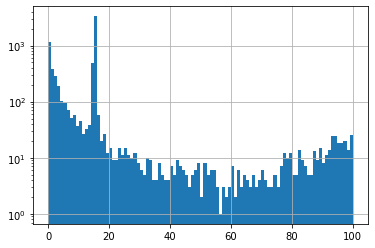

In [8]:
paper_dataset["fuelexp"].hist(bins=100).set_yscale('log')

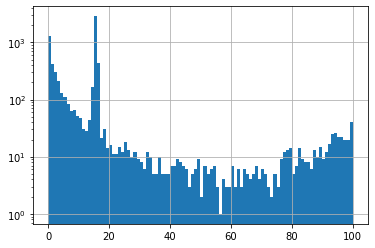

In [9]:
paper_dataset["fuel"].hist(bins=100).set_yscale('log')

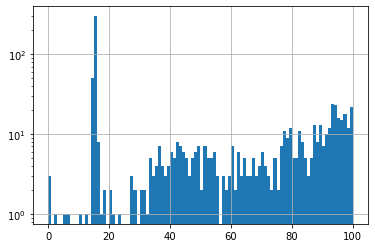

In [10]:
paper_dataset[paper_dataset["oil"] == 1]["fuelexp"].hist(bins=100).set_yscale('log')

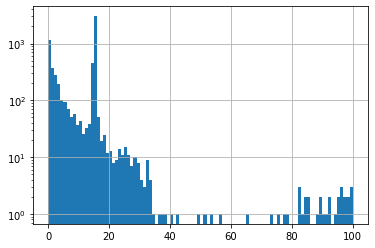

In [11]:
paper_dataset[paper_dataset["oil"] == 0]["fuelexp"].hist(bins=100).set_yscale('log')

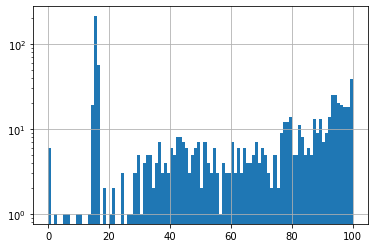

In [12]:
paper_dataset[paper_dataset["oil"] == 1]["fuel"].hist(bins=100).set_yscale('log')

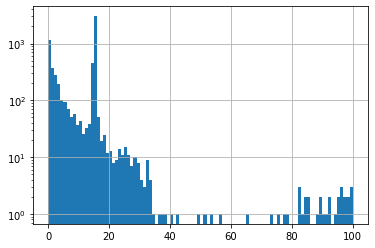

In [13]:
paper_dataset[paper_dataset["oil"] == 0]["fuelexp"].hist(bins=100).set_yscale('log')

In [14]:
# cid uniquely identifies a country, however in some cases when a country splits we have the 
# same CID for 2 different names in different years. This might be solved by joining on (year, cid)

paper_data_countries = pd.read_stata(ORIGINAL_PAPER_COUNTRY, columns=["country", "cid", "year"]).drop_duplicates()
#paper_data_countries.sample(10)
#paper_data_countries[paper_data_countries[["year", "cid"]].duplicated(keep=False)]

paper_data_countries[paper_data_countries["country"] == "Czechoslovakia"]

,country,cid,year
2240,Czechoslovakia,41.0,1945.0
2241,Czechoslovakia,41.0,1946.0
2242,Czechoslovakia,41.0,1947.0
2243,Czechoslovakia,41.0,1948.0
2244,Czechoslovakia,41.0,1949.0
2245,Czechoslovakia,41.0,1950.0
2246,Czechoslovakia,41.0,1951.0
2247,Czechoslovakia,41.0,1952.0
2248,Czechoslovakia,41.0,1953.0
2249,Czechoslovakia,41.0,1954.0


In [15]:
# Note to future selves: we lost Korea 1945-1949
paper_data_merged = paper_data_countries.merge(paper_dataset, on=["cid", "year"])

In [16]:
paper_data_merged.sample(10)

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,decade1,decade2,decade3,decade4,independ,tip,anocracy,proxregc,sxpnew.2,sxpsq.2
1223,Chile,32.0,1978.0,1224,0,1770,29.0,155,0,408,...,0,1,0,0,1,88.000000,0,3.906250e-03,-0.063785,-0.063785
3951,Malaysia,96.0,1959.0,3952,1,5335,84.0,820,0,11,...,0,0,0,0,1,2.000000,0,2.500000e-01,0.085543,0.085543
6988,Yugoslavia,169.0,1961.0,6989,0,9425,158.0,345,0,204,...,1,0,0,0,1,18.000000,0,6.100000e-05,0.092587,0.092587
5947,Sweden,142.0,1975.0,5948,0,7927,133.0,380,0,372,...,0,1,0,0,1,160.000000,0,4.810000e-35,-0.794981,-0.794981
2970,Iran,71.0,1989.0,2971,0,3965,65.0,630,0,510,...,0,0,1,0,1,4.000000,0,2.441410e-04,0.071298,0.071298
3555,Laos,85.0,1965.0,3556,1,4725,77.0,812,0,78,...,1,0,0,0,1,17.618058,1,1.000000e+00,-0.458006,-0.458006
1271,China,33.0,1970.0,1272,0,1818,30.0,710,0,257,...,0,1,0,0,1,1.000000,0,9.090000e-13,-0.058547,-0.058547
3046,Ireland,73.0,1953.0,3047,0,4041,67.0,205,0,108,...,0,0,0,0,1,32.000000,0,8.670000e-19,0.092326,0.092326
271,Australia,7.0,1974.0,272,0,366,5.0,900,0,360,...,0,1,0,0,1,55.000000,0,0.000000e+00,-0.516672,-0.516672
1601,Czechoslovakia,41.0,1959.0,1602,0,2255,36.0,315,0,180,...,0,0,0,0,1,14.000000,0,9.540000e-07,0.088232,0.088232


In [17]:
paper_data_merged[["country", "fuelexp", ]]

,country,fuelexp
0,Afghanistan,15.387903
1,Afghanistan,15.594645
2,Afghanistan,15.601810
3,Afghanistan,15.739340
4,Afghanistan,15.525010
...,...,...
7135,Zimbabwe,1.030000
7136,Zimbabwe,1.510000
7137,Zimbabwe,1.460000
7138,Zimbabwe,15.314596


In [18]:

years = np.unique(paper_data_merged.year.values)
countries = np.unique(paper_data_merged.country.values)

#df = pd.DataFrame(index = countries, columns = years)
fuelexp_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["fuelexp"])
fuelexp_pivot.columns = [int(x[1]) for x in fuelexp_pivot.columns]

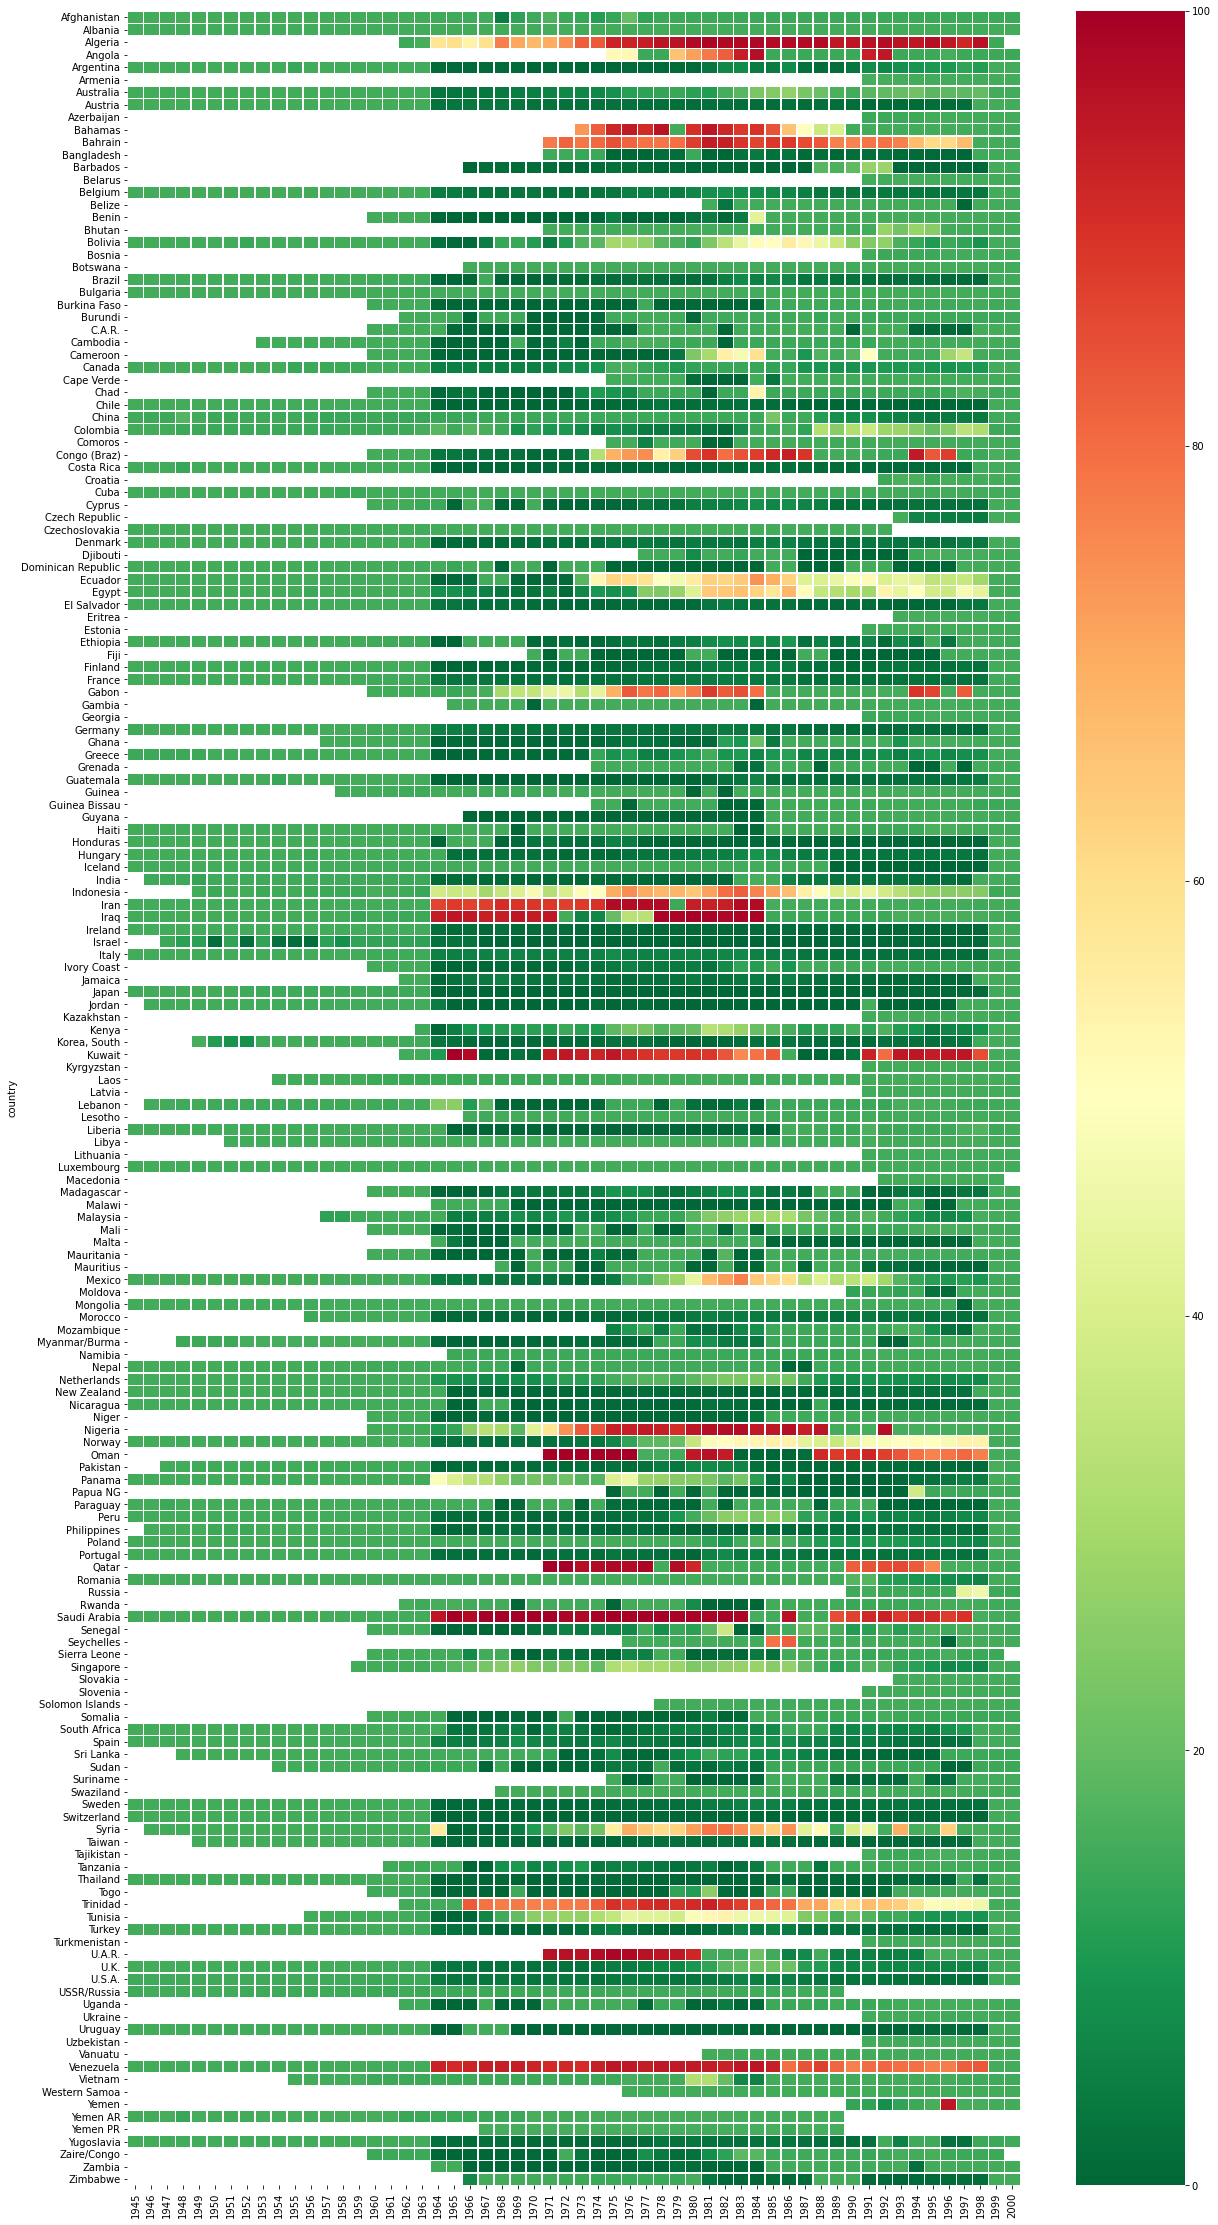

In [19]:
plt.figure(figsize=(20, 40))

sns.heatmap(fuelexp_pivot, cmap='RdYlGn_r', linewidths=0.5)

plt.show()

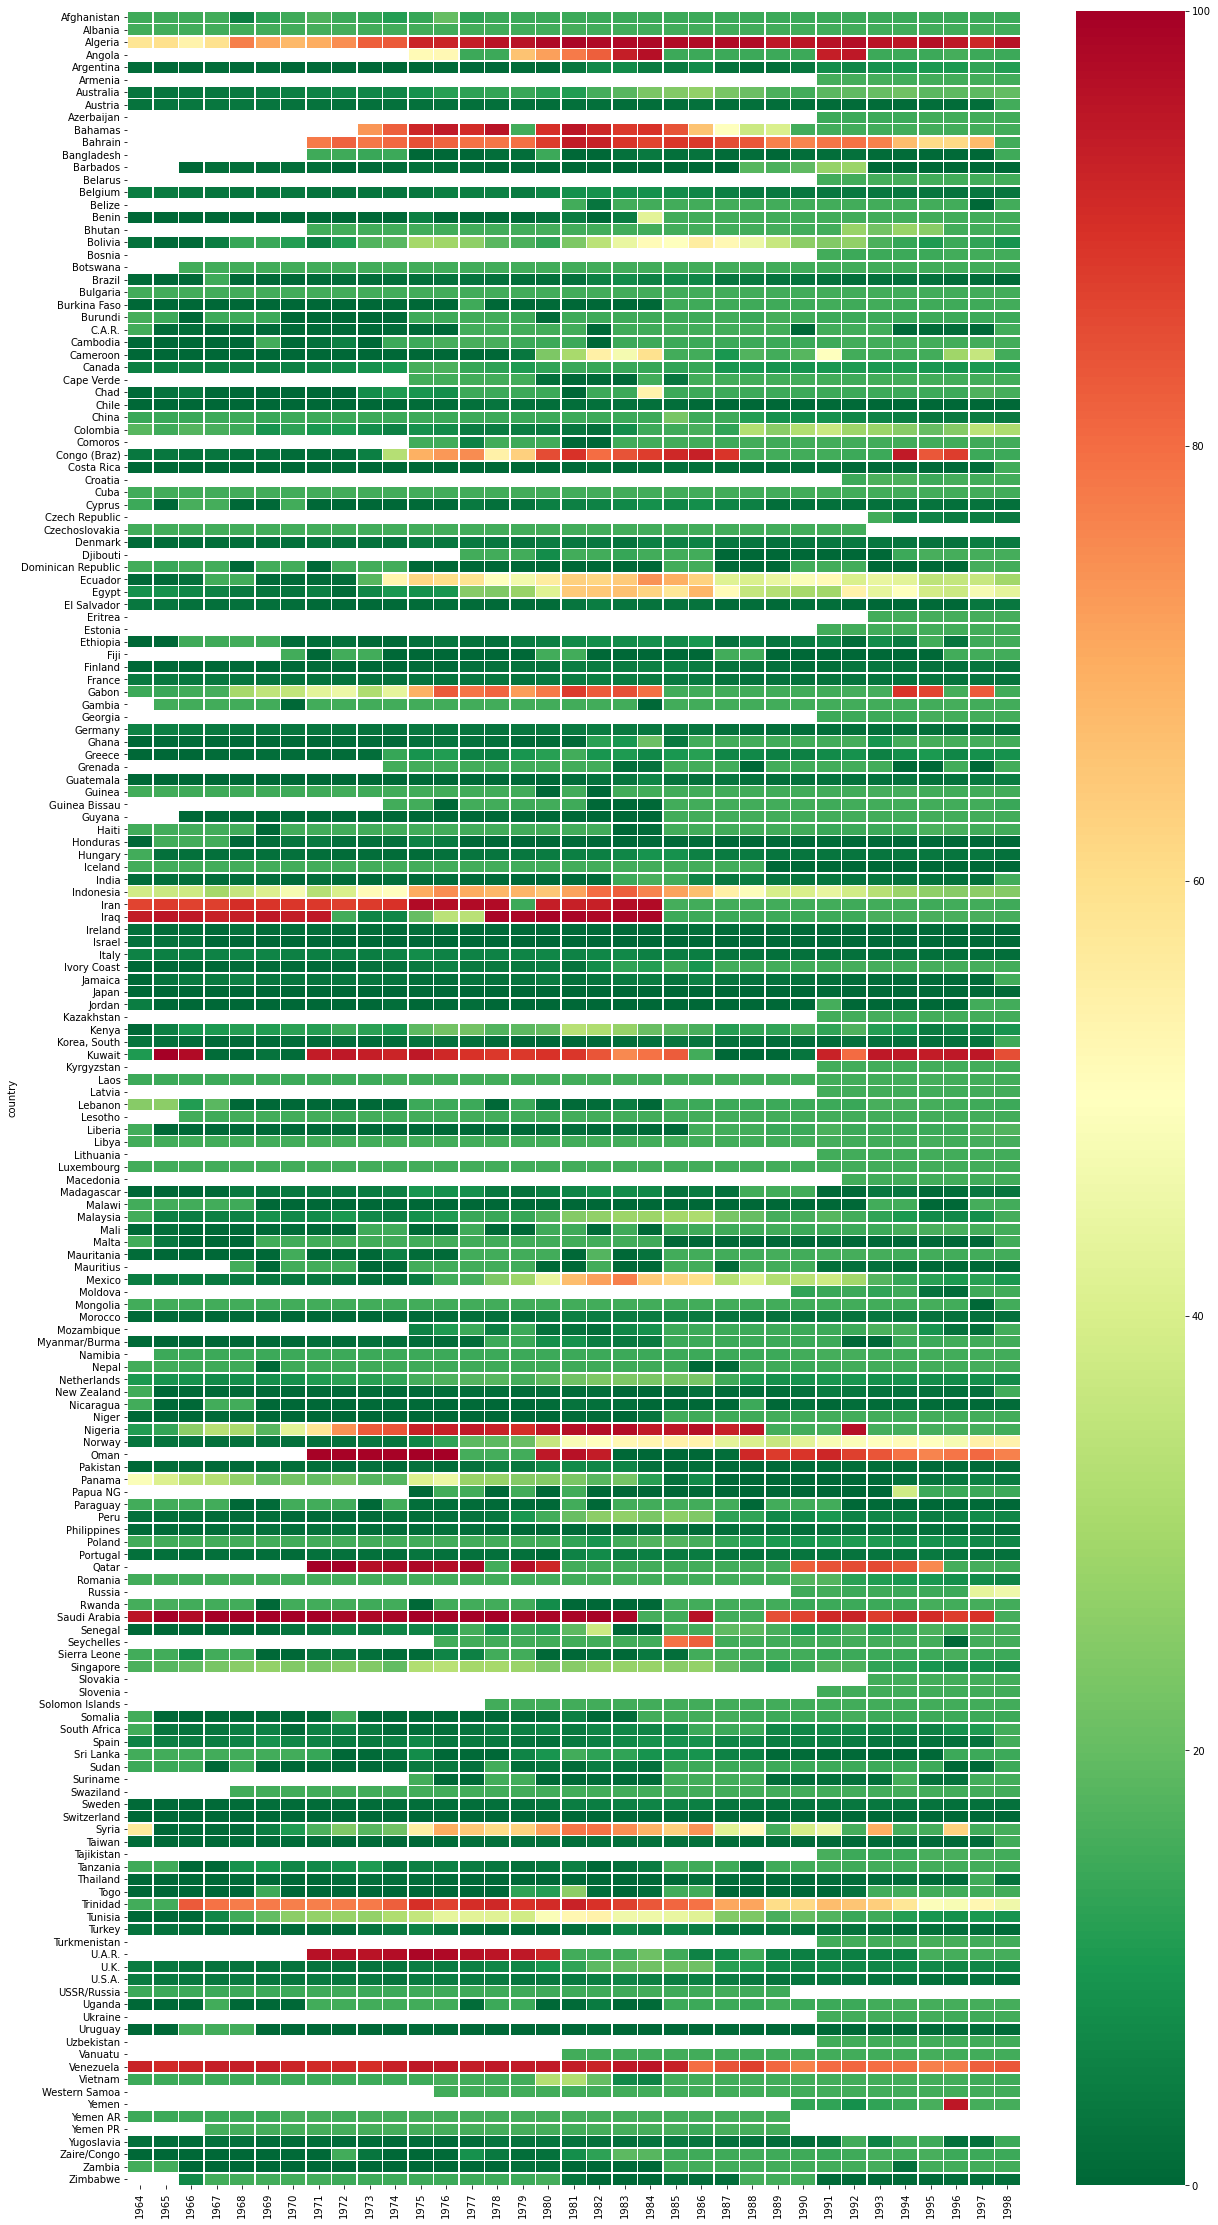

In [20]:
plt.figure(figsize=(20, 40))

sns.heatmap(fuelexp_pivot[range(1964, 2000)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

In [21]:
illit_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["illiteracy"])
illit_pivot.columns = [int(x[1]) for x in illit_pivot.columns]

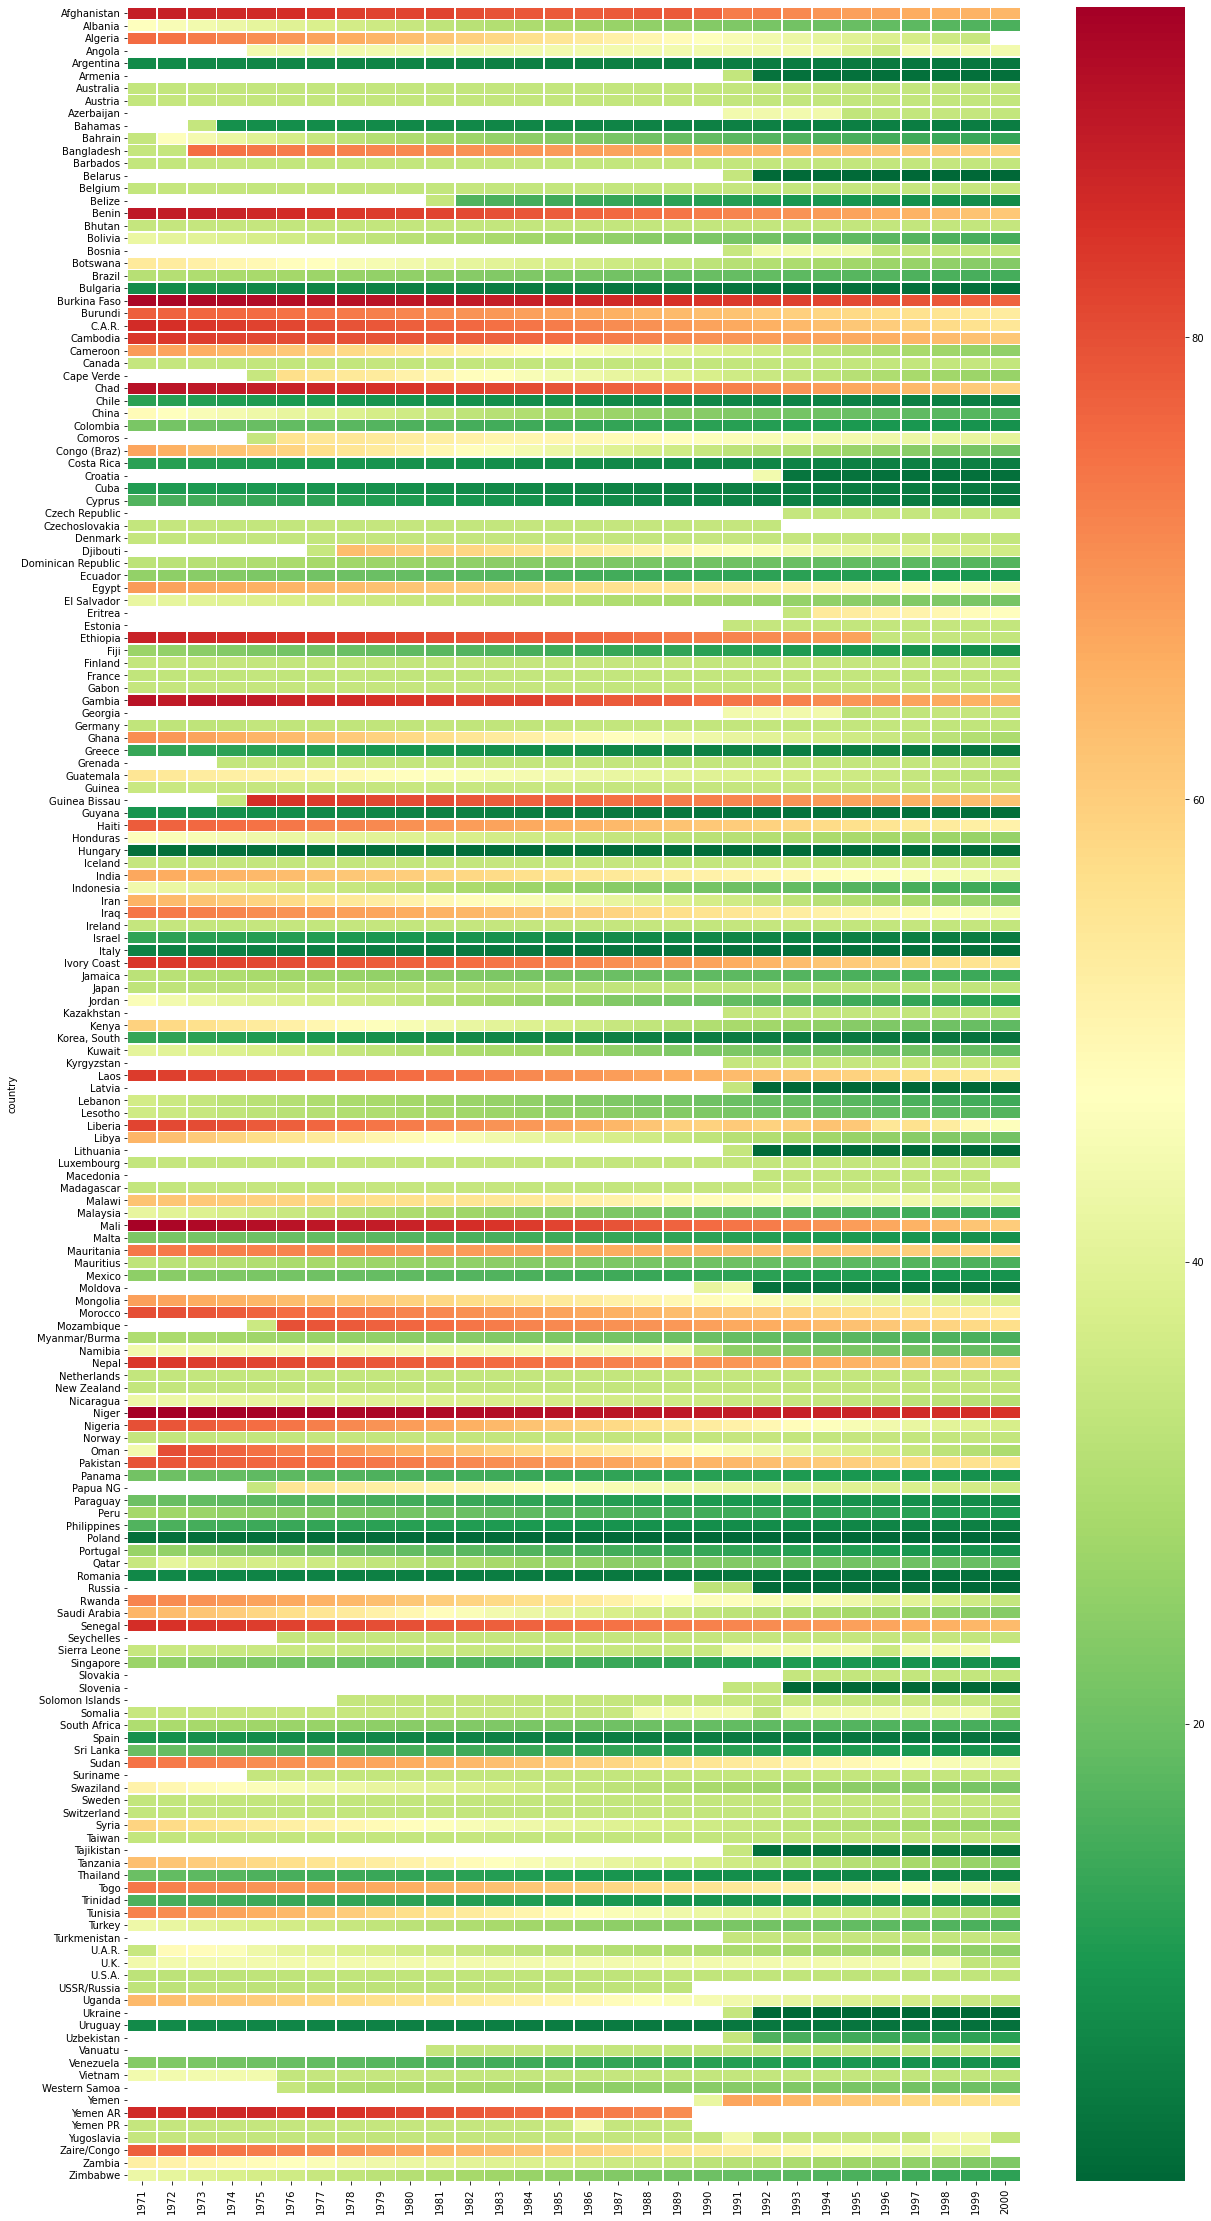

In [22]:
plt.figure(figsize=(20, 40))

sns.heatmap(illit_pivot[range(1971, 2001)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

In [23]:
infant_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["infant"])
infant_pivot.columns = [int(x[1]) for x in infant_pivot.columns]

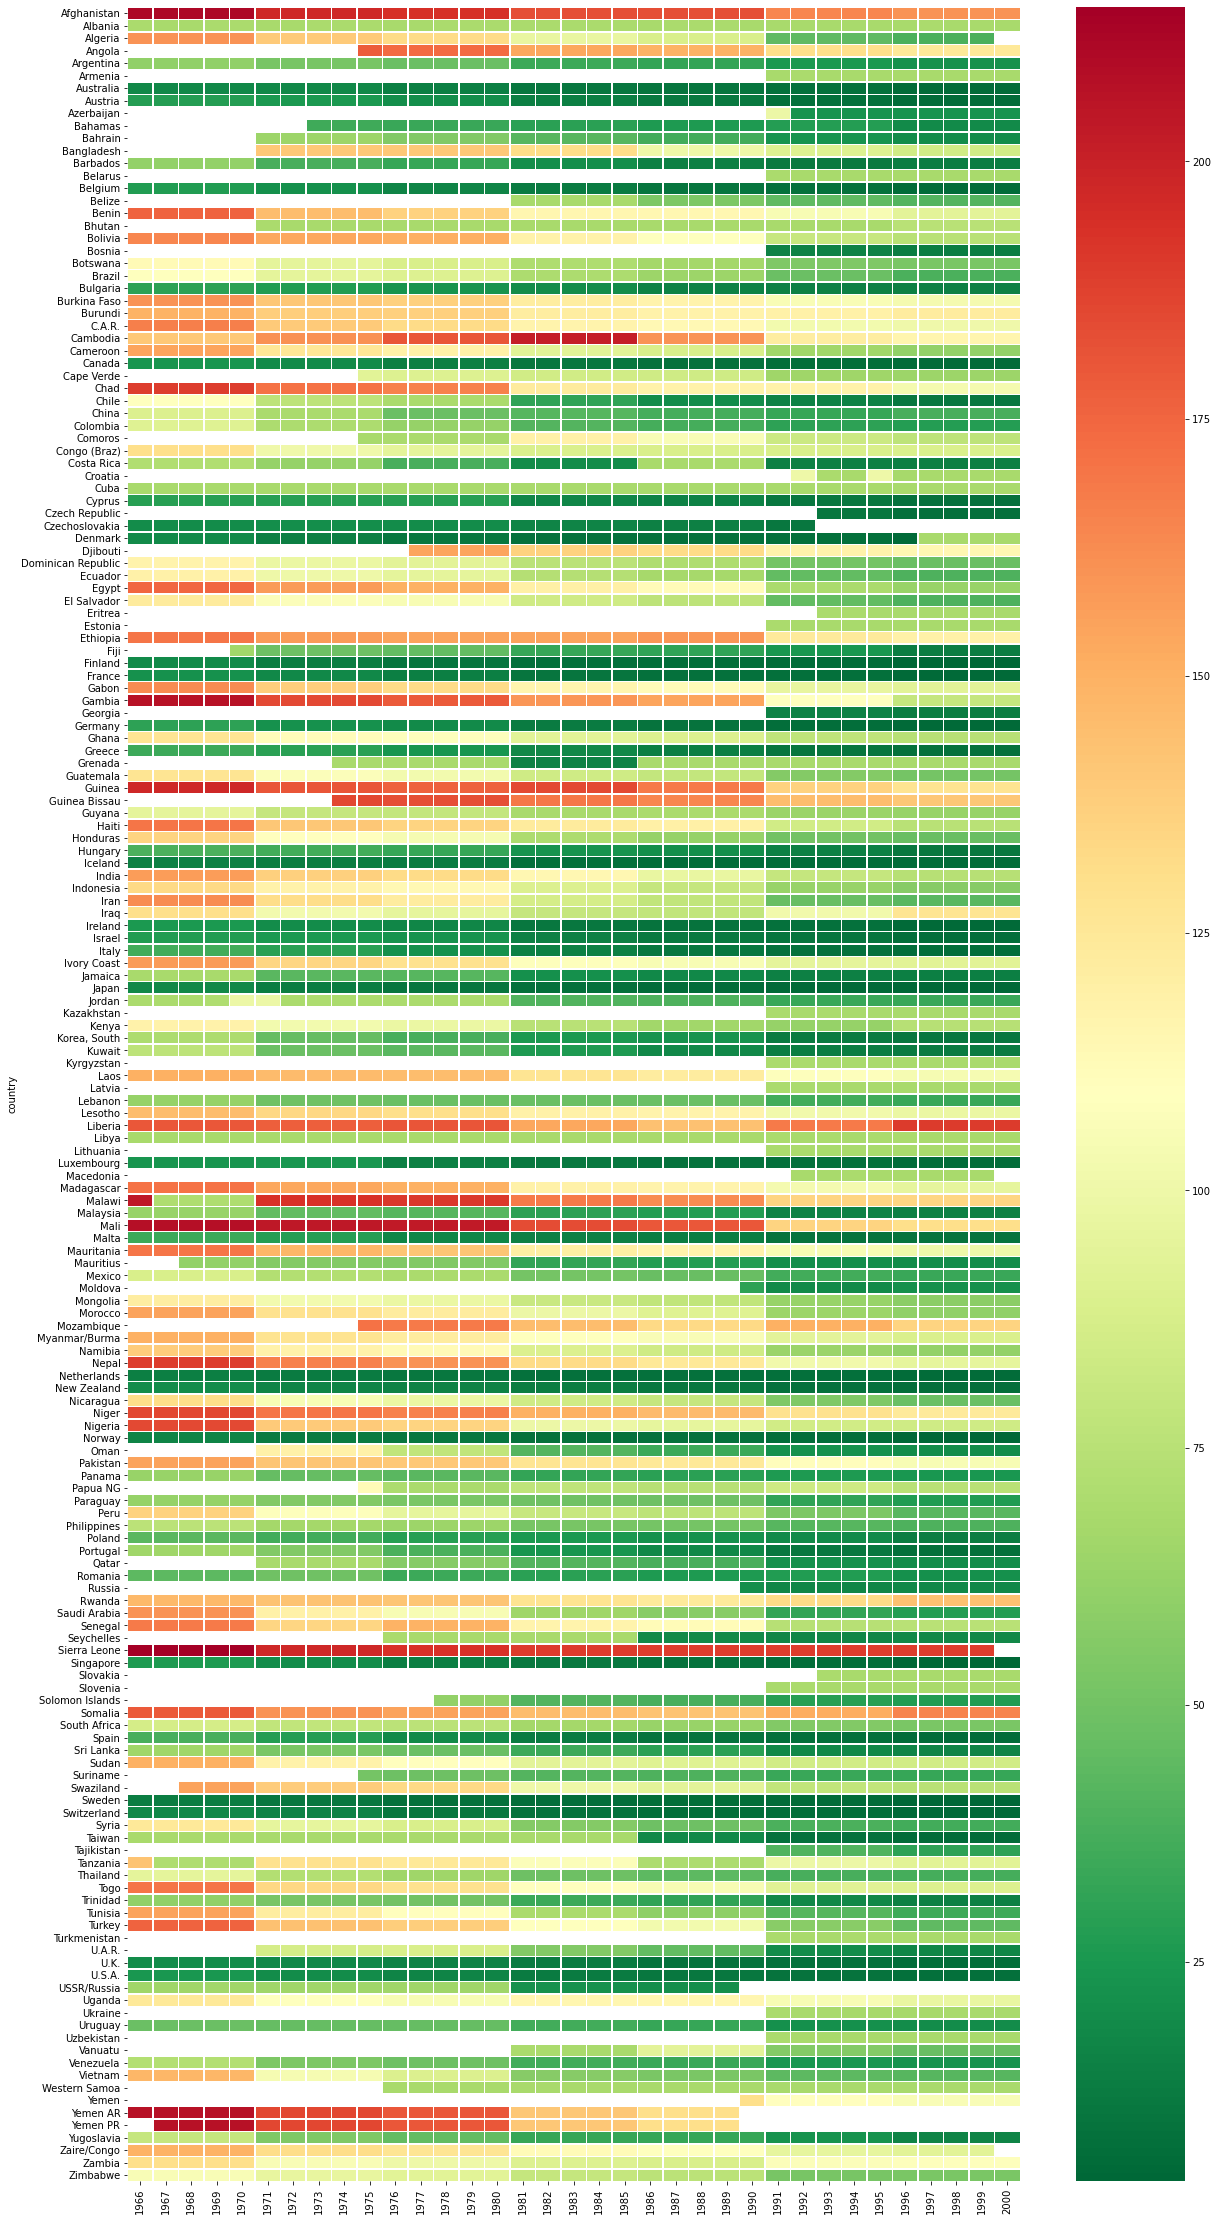

In [24]:
plt.figure(figsize=(20, 40))

sns.heatmap(infant_pivot[range(1966, 2001)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

In [25]:
life_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["life"])
life_pivot.columns = [int(x[1]) for x in life_pivot.columns]

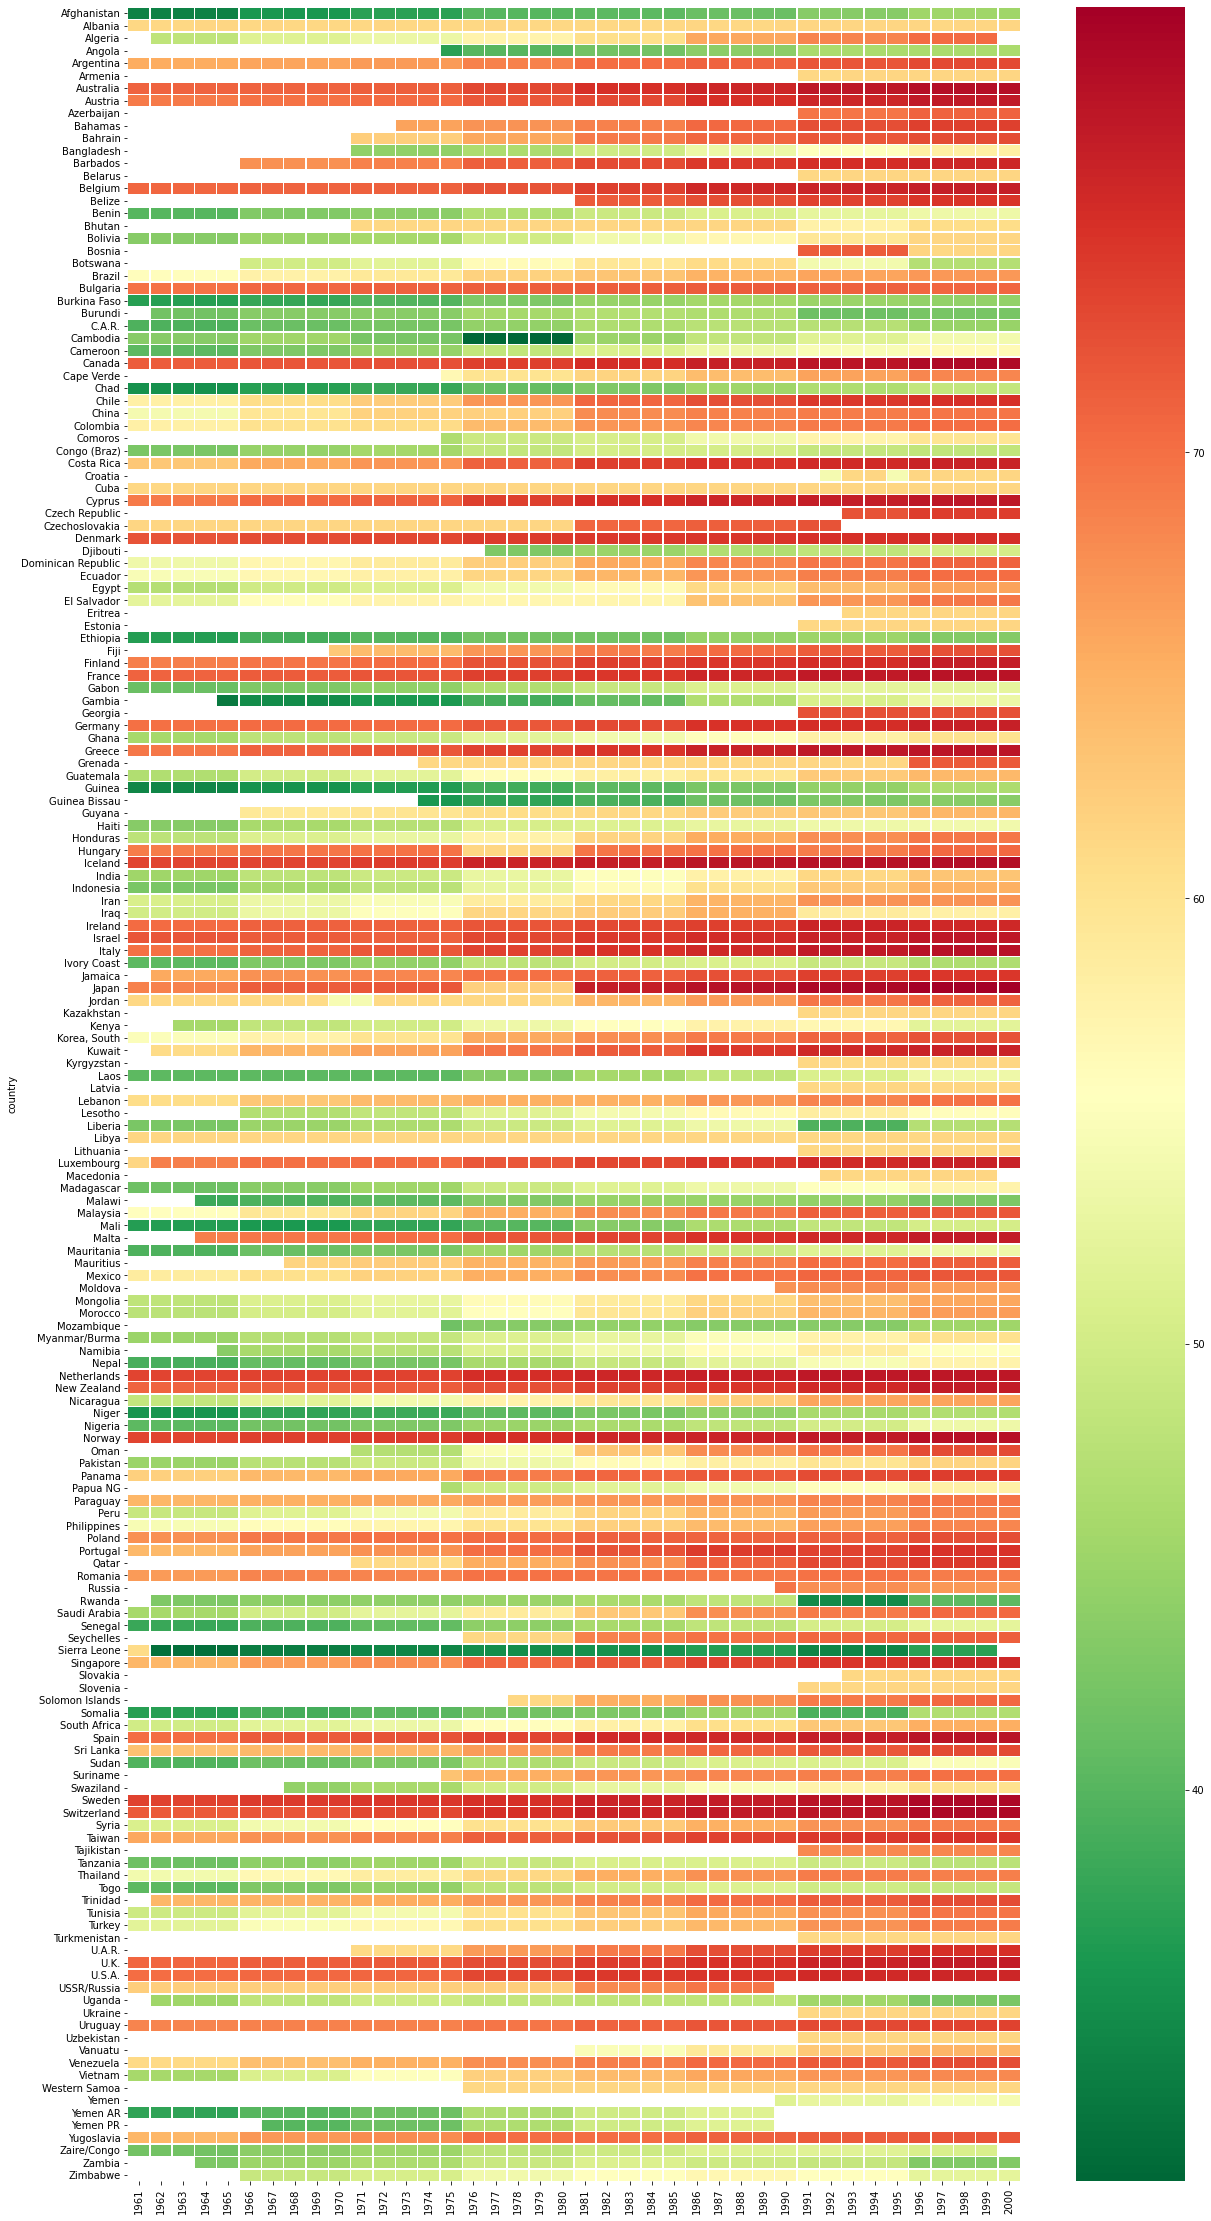

In [26]:
plt.figure(figsize=(20, 40))

sns.heatmap(life_pivot[range(1961, 2001)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

In [27]:
gdpg_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["life"])
gdpg_pivot.columns = [int(x[1]) for x in gdpg_pivot.columns]

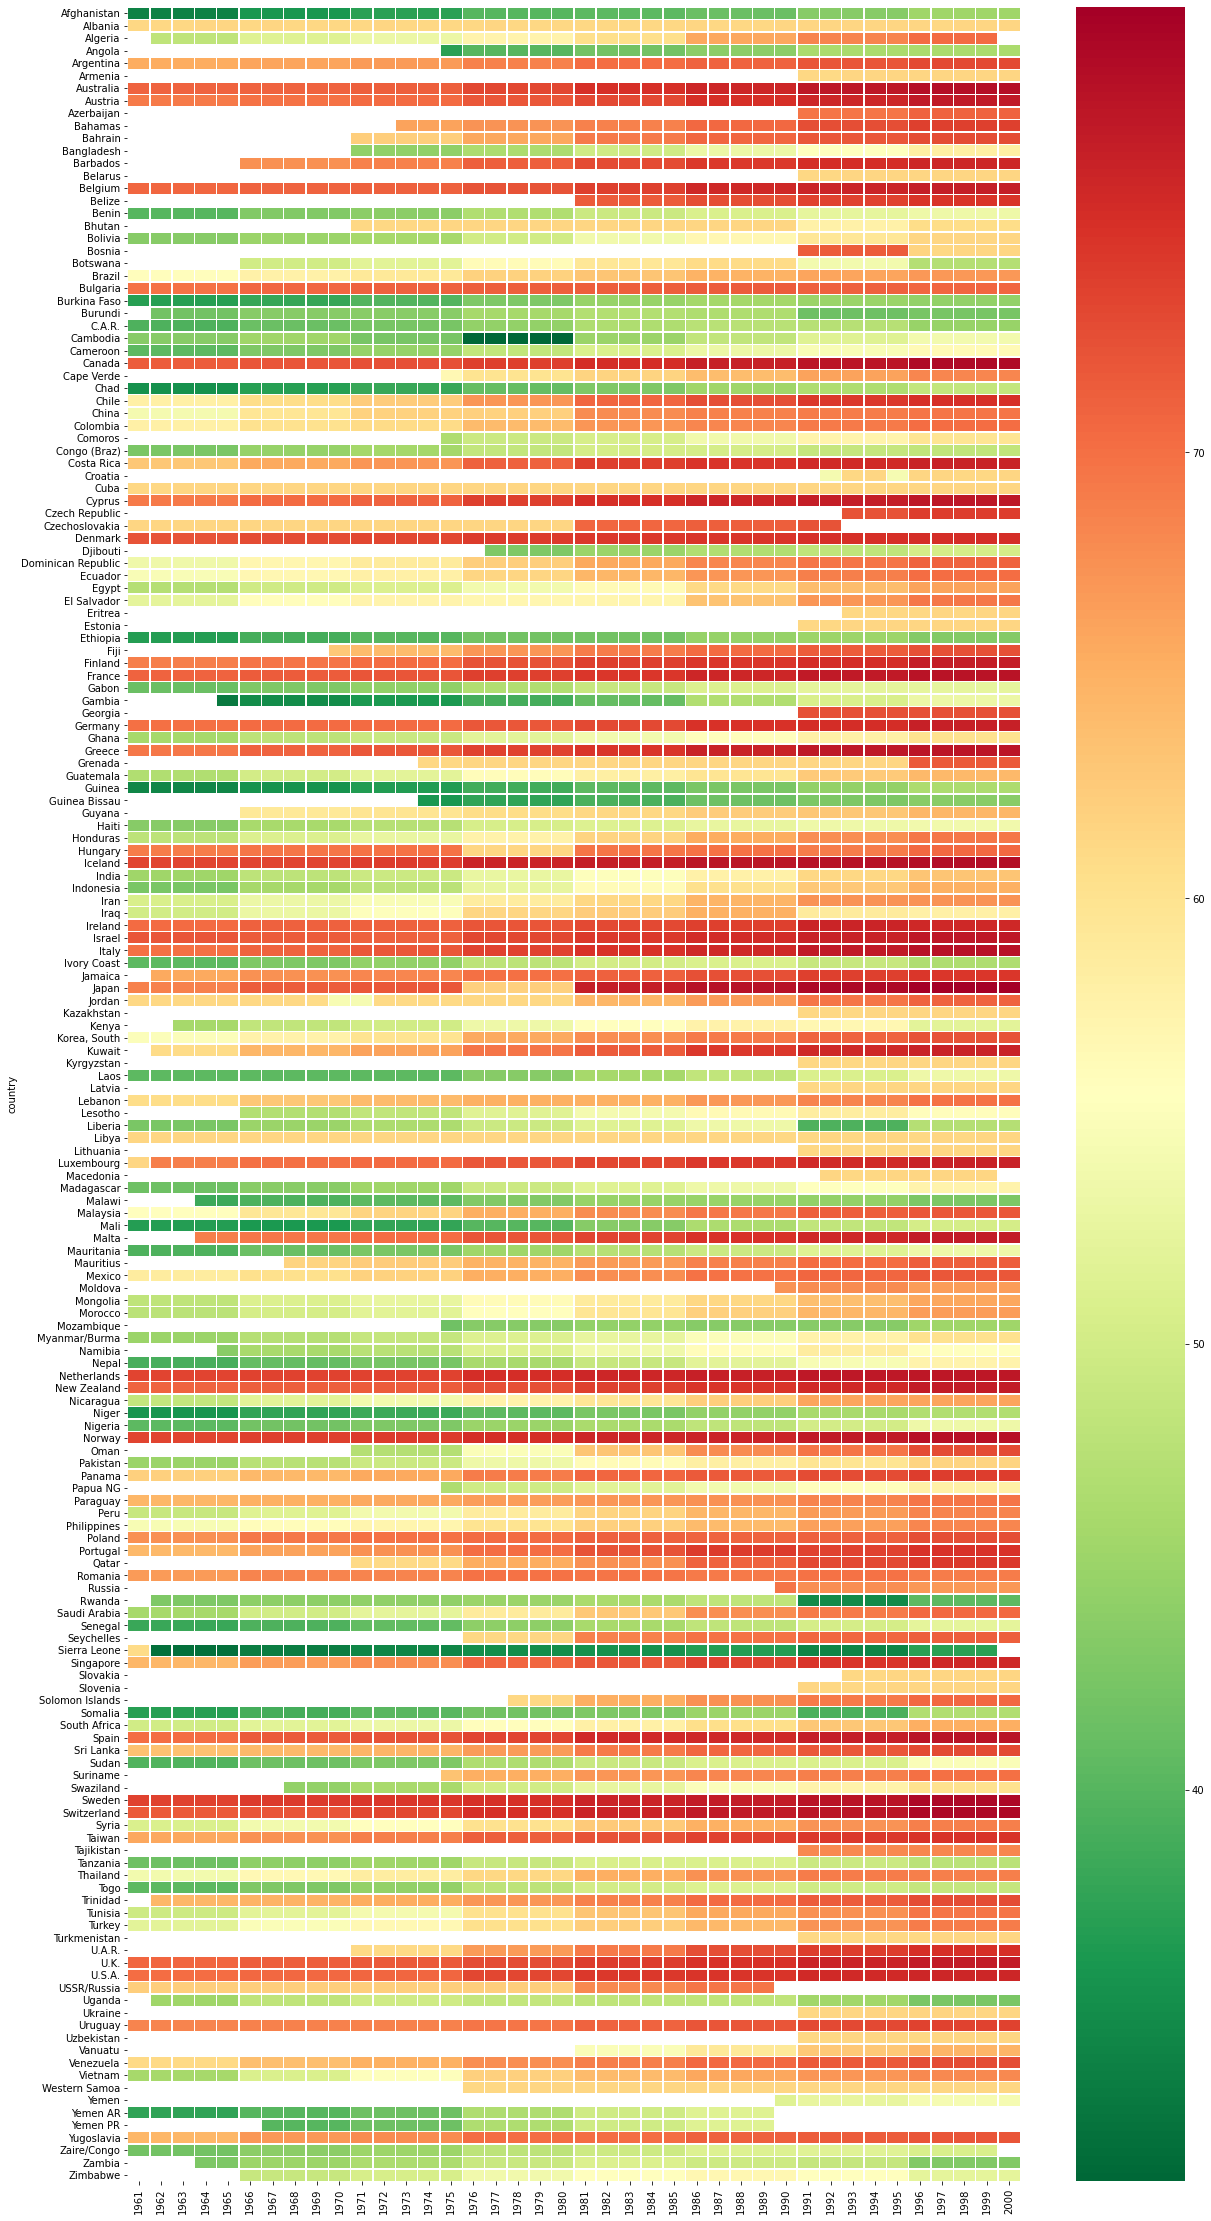

In [28]:
plt.figure(figsize=(20, 40))

sns.heatmap(gdpg_pivot[range(1961, 2001)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

## Data wrangling for wars in territories

1. Get a row for each territory there was a war in for each year
2. For each country that was at war, match name with existing database
2. We need some data cleaning: US never had a war in its territory!
3. For each year, add a 'war in' column in the existing database for each country + intensity level


In [29]:
# 1 extra-systemic (state vs non-state in state territory to keep control of the system) <- colonies
# 2 inter-state  
# 3 intra-state
# 4 intra-state internationalized

In [30]:
ucdp_prio_data.columns

Index(['conflict_id', 'location', 'side_a', 'side_a_id', 'side_a_2nd',
       'side_b', 'side_b_id', 'side_b_2nd', 'incompatibility',
       'territory_name', 'year', 'intensity_level', 'cumulative_intensity',
       'type_of_conflict', 'start_date', 'start_prec', 'start_date2',
       'start_prec2', 'ep_end', 'ep_end_date', 'ep_end_prec', 'gwno_a',
       'gwno_a_2nd', 'gwno_b', 'gwno_b_2nd', 'gwno_loc', 'region', 'version'],
      dtype='object')

In [31]:
len(ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 1) & (ucdp_prio_data.cumulative_intensity == 0)]) # In this case, war is fought in location : we got this

50

In [32]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 1] # In this case, war is fought in location : we got this

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
154,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
155,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
156,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
157,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
158,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,285,Mozambique,Government of Portugal,36,NaN,Frelimo,428,NaN,1,Mozambique,...,1,1974-09-07,NaN,235,NaN,NaN,NaN,541,4,20.1
1104,286,South Yemen,Government of United Kingdom,28,NaN,FLOSY,265,NaN,1,Aden/South Yemen,...,0,NaN,NaN,200,NaN,NaN,NaN,680,2,20.1
1105,286,South Yemen,Government of United Kingdom,28,NaN,FLOSY,265,NaN,1,Aden/South Yemen,...,0,NaN,NaN,200,NaN,NaN,NaN,680,2,20.1
1106,286,South Yemen,Government of United Kingdom,28,NaN,FLOSY,265,NaN,1,Aden/South Yemen,...,0,NaN,NaN,200,NaN,NaN,NaN,680,2,20.1


In [33]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 2] # No clear idea: however, only 48 conflicts: we can classify manually

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
2,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1967-06-10,NaN,651,NaN,666,NaN,"651, 666",2,20.1
3,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,0,NaN,NaN,651,NaN,666,NaN,"651, 666",2,20.1
4,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1970-08-07,NaN,651,NaN,666,NaN,"651, 666",2,20.1
5,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1973-10-24,NaN,651,NaN,666,NaN,"651, 666",2,20.1
31,11348,"South Sudan, Sudan",Government of South Sudan,113,NaN,Government of Sudan,112,NaN,1,Common border,...,1,2012-12-26,NaN,626,NaN,625,NaN,"625, 626",4,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,409,"Eritrea, Ethiopia",Government of Eritrea,98,NaN,Government of Ethiopia,97,NaN,1,Common border,...,1,2016-06-13,NaN,531,NaN,530,NaN,"530, 531",4,20.1
2354,420,"Australia, Iraq, United Kingdom, United States...","Government of Australia, Government of United ...","156, 28, 3",NaN,Government of Iraq,116,NaN,2,NaN,...,1,2003-04-28,NaN,"900, 200, 2",NaN,645,NaN,"2, 200, 645, 900","1, 2, 3, 5",20.1
2401,427,"Tanzania, Uganda",Government of Tanzania,92,NaN,Government of Uganda,90,NaN,1,Kagera Salient,...,1,1978-11-16,NaN,510,NaN,500,NaN,"500, 510",4,20.1
2414,431,"Afghanistan, Russia (Soviet Union)",Government of Afghanistan,130,NaN,Government of Russia (Soviet Union),57,NaN,2,NaN,...,1,1979-12-28,NaN,700,NaN,365,NaN,"365, 700","1, 3",20.1


In [34]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 3] # In this case, war is fought in location : we got this

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
0,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2012-12-21,NaN,750,NaN,NaN,NaN,750,3,20.1
1,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2014-11-27,NaN,750,NaN,NaN,NaN,750,3,20.1
6,11344,Sudan,Government of Sudan,112,NaN,Republic of South Sudan,1129,NaN,1,Abyei,...,1,2011-06-15,NaN,625,NaN,NaN,NaN,625,4,20.1
7,11345,South Sudan,Government of South Sudan,113,NaN,"SSDM/A, SSLM/A","1108, 1124",NaN,2,NaN,...,0,NaN,NaN,626,NaN,NaN,NaN,626,4,20.1
8,11345,South Sudan,Government of South Sudan,113,NaN,SSLM/A,1124,NaN,2,NaN,...,0,NaN,NaN,626,NaN,NaN,NaN,626,4,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,440,Myanmar (Burma),Government of Myanmar (Burma),144,NaN,LNUP,889,NaN,1,Lahu,...,0,NaN,NaN,775,NaN,NaN,NaN,775,3,20.1
2443,440,Myanmar (Burma),Government of Myanmar (Burma),144,NaN,LNUP,889,NaN,1,Lahu,...,0,NaN,NaN,775,NaN,NaN,NaN,775,3,20.1
2444,440,Myanmar (Burma),Government of Myanmar (Burma),144,NaN,LNUP,889,NaN,1,Lahu,...,0,NaN,NaN,775,NaN,NaN,NaN,775,3,20.1
2445,440,Myanmar (Burma),Government of Myanmar (Burma),144,NaN,LNUP,889,NaN,1,Lahu,...,1,1982-12-31,NaN,775,NaN,NaN,NaN,775,3,20.1


In [35]:
ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 3) & (ucdp_prio_data.intensity_level == 1) & (ucdp_prio_data.location == 'United Kingdom')]

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
1499,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1500,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1501,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1502,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1503,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1504,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1505,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1506,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1507,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1508,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1


In [36]:
ucdp_prio_data[(ucdp_prio_data.type_of_conflict != 2) & (ucdp_prio_data.location.str.contains('United States'))]

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
705,238,United States of America,Government of United States of America,3,NaN,Puerto Rican Nationalist Party,733,NaN,1,Puerto Rico,...,1,1950-11-01,NaN,2,NaN,NaN,NaN,2,5,20.1
2332,418,United States of America,Government of United States of America,3,"Government of Australia, Government of Canada,...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"900, 20, 220, 260, 325, 290, 640, 200",NaN,NaN,2,5,20.1
2333,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Austr...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 900, 20, 390, 220, 260, 350, 325, 740, 66...",NaN,NaN,2,5,20.1
2334,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Canad...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 20, 390, 220, 325, 368, 210, 920, 385, 77...",NaN,NaN,2,5,20.1
2335,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Belgi...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 211, 20, 316, 220, 260, 325, 770, 290, 23...",NaN,NaN,2,5,20.1
2336,418,United States of America,Government of United States of America,3,"Government of Belgium, Government of Canada, G...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"211, 20, 344, 390, 366, 220, 325, 690, 210, 38...",NaN,NaN,2,5,20.1
2337,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Pakis...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 770, 670, 200",NaN,NaN,2,5,20.1
2338,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Pakis...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 770, 670, 200",NaN,NaN,2,5,20.1
2339,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Czech...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 316, 770, 360",NaN,NaN,2,5,20.1
2340,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Canad...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 20, 316, 220, 663, 210, 770, 360",NaN,NaN,2,5,20.1


In [37]:
# Idea: always match countries with others that have the same intensity of war. Keep all intensities. 

## Selecting usefil columns from datasets and merging on conflict id
To know the geographic location of war we merge the USCP/PRIO dataset with the disgragated dataset(ged-201) in order to have a new dataset with important information for data analysis. So we did a filtering on the columns of the two datasets and we merged using the feature conflic_id_new, for the disgragated dataset, and the feature conflict_id for the USCD/PRIO dataset. These two features are fully compatible and identify a specific conflict.
Using USCP dataset we select conflicts with types of conflict equal to 1, 3 or 4 (extrasystemic, intrastate, internationalzed intrastate) because in these cases the location correspond to the geografic location which is not true in general. For conflicts of type 2 (interstates) we use the merging as described above for conflicts starting from 1989, for the others we 'build' the geographic location manually using the geografic area. 

In [38]:
ged_201.columns
ged_filtered = ged_201[['conflict_new_id','country','year']].copy()
ucdp_filters = ucdp_prio_data[['conflict_id','year', 'intensity_level', 'cumulative_intensity',
       'type_of_conflict']].copy()
conflict_merged=pd.merge(ged_filtered, ucdp_filters, left_on= ['conflict_new_id','year'], right_on =['conflict_id','year']).drop_duplicates()

In [39]:
conflict_merged[(conflict_merged['year']>1959) & (conflict_merged['year']<=2000)]

,conflict_new_id,country,year,conflict_id,intensity_level,cumulative_intensity,type_of_conflict
529,333,Afghanistan,1989,333,2,1,4
666,333,Afghanistan,1990,333,2,1,3
705,333,Afghanistan,1991,333,2,1,3
765,333,Afghanistan,1992,333,2,1,3
834,333,Afghanistan,1996,333,2,1,3
...,...,...,...,...,...,...,...
162376,314,Uganda,1994,314,1,1,3
163519,315,United Kingdom,1991,315,1,1,3
163539,315,United Kingdom,1998,315,1,1,3
163548,277,Venezuela,1992,277,1,0,3


In [40]:
conflict_merged=conflict_merged.drop('conflict_new_id',axis=1)

In [41]:
conflict_merged[conflict_merged['conflict_id']==315]
ged_201[ged_201['conflict_new_id']==315].year
ged_201['year'].min()

1989

#### Selecting conflicts of types (1,3,4)

In [42]:
ucdp_prio_data_new=ucdp_prio_data[(ucdp_prio_data['year']>1960) & (ucdp_prio_data['year']<=2000)]
ucdp_prio_data_134 = ucdp_prio_data_new[ucdp_prio_data_new['type_of_conflict']!=2]

In [43]:
ucdp_prio_data_2 = ucdp_prio_data_new[ucdp_prio_data_new['type_of_conflict']==2]
ucdp_prio_data_2

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
2,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1967-06-10,NaN,651,NaN,666,NaN,"651, 666",2,20.1
3,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,0,NaN,NaN,651,NaN,666,NaN,"651, 666",2,20.1
4,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1970-08-07,NaN,651,NaN,666,NaN,"651, 666",2,20.1
5,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1973-10-24,NaN,651,NaN,666,NaN,"651, 666",2,20.1
286,218,"India, Pakistan",Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,405,"Cameroon, Nigeria",Government of Cameroon,83,NaN,Government of Nigeria,84,NaN,1,Bakassi,...,1,1996-05-07,NaN,471,NaN,475,NaN,"471, 475",4,20.1
2274,409,"Eritrea, Ethiopia",Government of Eritrea,98,NaN,Government of Ethiopia,97,NaN,1,Common border,...,0,NaN,NaN,531,NaN,530,NaN,"530, 531",4,20.1
2275,409,"Eritrea, Ethiopia",Government of Eritrea,98,NaN,Government of Ethiopia,97,NaN,1,Common border,...,0,NaN,NaN,531,NaN,530,NaN,"530, 531",4,20.1
2401,427,"Tanzania, Uganda",Government of Tanzania,92,NaN,Government of Uganda,90,NaN,1,Kagera Salient,...,1,1978-11-16,NaN,510,NaN,500,NaN,"500, 510",4,20.1


#### Selecting conflicts of type 2 after the 1989

In [44]:
ucdp_prio_data_2[ucdp_prio_data_2['year']>1988].head()

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
291,218,"India, Pakistan",Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1
292,218,"India, Pakistan",Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1
293,218,"India, Pakistan",Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1
294,218,"India, Pakistan",Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,1,1992-12-31,NaN,750,NaN,770,NaN,"750, 770",3,20.1
295,218,"India, Pakistan",Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1


In [45]:
ucdp_2_after1989=pd.merge(ged_filtered, ucdp_prio_data_2, left_on= ['conflict_new_id','year'], right_on =['conflict_id','year']).drop_duplicates()

In [46]:
ucdp_2_after1989.drop(["conflict_new_id", "location"], axis=1, inplace=True)

In [47]:
# drop "location" and rename country to "location". Now location is geographical location
ucdp_2_after1989.rename(columns = {"country" : "location"}, inplace=True)
ucdp_2_after1989

,location,year,conflict_id,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
0,Cameroon,1996,405,Government of Cameroon,83,NaN,Government of Nigeria,84,NaN,1,...,1,1996-05-07,NaN,471,NaN,475,NaN,"471, 475",4,20.1
3,Ecuador,1995,403,Government of Ecuador,20,NaN,Government of Peru,21,NaN,1,...,1,1995-12-31,NaN,130,NaN,135,NaN,"130, 135",5,20.1
7,Peru,1995,403,Government of Ecuador,20,NaN,Government of Peru,21,NaN,1,...,1,1995-12-31,NaN,130,NaN,135,NaN,"130, 135",5,20.1
29,Eritrea,1998,409,Government of Eritrea,98,NaN,Government of Ethiopia,97,NaN,1,...,0,NaN,NaN,531,NaN,530,NaN,"530, 531",4,20.1
32,Ethiopia,1998,409,Government of Eritrea,98,NaN,Government of Ethiopia,97,NaN,1,...,0,NaN,NaN,531,NaN,530,NaN,"530, 531",4,20.1
40,Eritrea,1999,409,Government of Eritrea,98,NaN,Government of Ethiopia,97,NaN,1,...,0,NaN,NaN,531,NaN,530,NaN,"530, 531",4,20.1
51,Ethiopia,1999,409,Government of Eritrea,98,NaN,Government of Ethiopia,97,NaN,1,...,0,NaN,NaN,531,NaN,530,NaN,"530, 531",4,20.1
54,India,1989,218,Government of India,141,NaN,Government of Pakistan,142,NaN,1,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1
55,India,1990,218,Government of India,141,NaN,Government of Pakistan,142,NaN,1,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1
59,Pakistan,1990,218,Government of India,141,NaN,Government of Pakistan,142,NaN,1,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1


#### Selecting manually the location of interstate conflicts (2) before 1989

In [48]:
ucdp_prio_data_2[ucdp_prio_data_2['year']<1970].head()

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
2,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1967-06-10,NaN,651,NaN,666,NaN,"651, 666",2,20.1
3,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,0,NaN,NaN,651,NaN,666,NaN,"651, 666",2,20.1
286,218,"India, Pakistan",Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1
287,218,"India, Pakistan",Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,1,1965-12-15,NaN,750,NaN,770,NaN,"750, 770",3,20.1
951,268,"Ethiopia, Somalia",Government of Ethiopia,97,NaN,Government of Somalia,95,NaN,1,Ogaden,...,1,1964-03-30,NaN,530,NaN,520,NaN,"520, 530",4,20.1


In [49]:
ucdp_before_1970 = ucdp_prio_data_2[ucdp_prio_data_2['year']<1970].copy()
ucdp_before_1970["location"] = ucdp_before_1970["location"].str.split(', ')

In [50]:
ucdp_before_1970_exp = ucdp_before_1970.explode("location")
ucdp_before_1970_exp.index = range(2500, 2500+len(ucdp_before_1970_exp))

In [51]:
udcp_before_1970_manual = ucdp_before_1970_exp.drop([
    2501, # Israel Suez
    2503, # Israel Suez
    2509, # Somalia Ogaden
    2510, # France 1961 (vs Tunisia)
    2517, # France 1961 (vs Tunisia)
    2529, # North Vietnam 1965
    2531, # North Vietnam 1965
    2533, # North Vietnam 1965
    2535, # North Vietnam 1965
    2537, # North Vietnam 1965
    2540, # Israel Golan
])

In [52]:
df_1988 = ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 2) & (ucdp_prio_data.year >= 1980) & (ucdp_prio_data.year<=1988)].copy()
df_1988["location"] = df_1988["location"].str.split(', ')
df_1988_exploded = df_1988.explode("location")
df_1988_exploded.index = range(2700, 2700+len(df_1988_exploded))
udcp_before_1988_manual = df_1988_exploded.drop([2739, 2743, 2707])

In [53]:
ucdp_before_1980 = ucdp_prio_data_2[(ucdp_prio_data_2['year']>1970) & (ucdp_prio_data_2['year']<1980)].copy()
ucdp_before_1980["location"] = ucdp_before_1980["location"].str.split(', ')
ucdp_before_1980_exp = ucdp_before_1980.explode("location")
ucdp_before_1980_exp.index = list(range(2600, 2600+len(ucdp_before_1980_exp)))
ucdp_before_1980_manual = ucdp_before_1980_exp.drop([2601 # Israel Suez
                           ,2605 # Somalia Ogaden
                           ,2607,# Somalia Ogaden
                           2609, # Somalia Ogaden
                           2611, #North Vietnam
                           2613, #North Vietnam
                           2615, #North Vietnam
                           2617, #North Vietnam
                           2622, #Israel Golan
                           2629, #Turkey north cyprus
                           2645, #Uganda Kagera Salient
                           2647, #Russia
                          ])

In [54]:
ucdp_manual = pd.concat([udcp_before_1970_manual, ucdp_before_1980_manual, udcp_before_1988_manual])

In [55]:
ucdp_conflict_level2 = pd.concat([ucdp_manual, ucdp_2_after1989])

In [56]:
ucdp_conflict_level2.sample(10)

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
2751,356,Thailand,Government of Laos,149,NaN,Government of Thailand,147,NaN,1,Common Border,...,1,1988-02-17,NaN,812,NaN,800,NaN,"800, 812",3,20.1
79,218,India,Government of India,141,NaN,Government of Pakistan,142,NaN,1,Kashmir,...,0,NaN,NaN,750,NaN,770,NaN,"750, 770",3,20.1
2610,293,South Vietnam,Government of South Vietnam,151,"Government of Australia, Government of New Zea...",Government of Vietnam (North Vietnam),150,Government of North Korea,1,South Vietnam,...,0,NaN,NaN,817,"900, 920, 732, 800, 2",816,731,"816, 817",3,20.1
2534,293,South Vietnam,Government of South Vietnam,151,"Government of Australia, Government of New Zea...",Government of Vietnam (North Vietnam),150,Government of North Korea,1,South Vietnam,...,0,NaN,NaN,817,"900, 920, 840, 732, 800, 2",816,731,"816, 817",3,20.1
2630,324,Iran,Government of Iran,114,NaN,Government of Iraq,116,NaN,3,Various,...,1,1974-12-31,NaN,630,NaN,645,NaN,"630, 645",2,20.1
2527,281,Malaysia,Government of Indonesia,155,NaN,Government of Malaysia,152,Government of United Kingdom,1,North Borneo,...,1,1966-08-11,NaN,850,NaN,820,200,"820, 850",3,20.1
2519,278,Morocco,Government of Algeria,109,NaN,Government of Morocco,108,NaN,1,Common Border,...,1,1963-11-04,NaN,615,NaN,600,NaN,"600, 615",4,20.1
2625,320,Yemen (North Yemen),Government of South Yemen,124,NaN,Government of Yemen (North Yemen),123,NaN,3,Common border,...,1,1972-10-19,NaN,680,NaN,678,NaN,"678, 680",2,20.1
2713,324,Iraq,Government of Iran,114,NaN,Government of Iraq,116,NaN,3,Various,...,0,NaN,NaN,630,NaN,645,NaN,"630, 645",2,20.1
2731,334,Vietnam (North Vietnam),Government of China,135,NaN,Government of Vietnam (North Vietnam),150,NaN,1,Various,...,1,1984-12-31,NaN,710,NaN,816,NaN,"710, 816",3,20.1


In [57]:
ucdp_wrangled = pd.concat([ucdp_prio_data_134, ucdp_conflict_level2])[["location", "year", "conflict_id", "intensity_level", "cumulative_intensity",
              "territory_name", "region"]].sort_values(by="year")

In [58]:
ucdp_wrangled

,location,year,conflict_id,intensity_level,cumulative_intensity,territory_name,region
776,India,1961,251,1,1,Nagaland,3
438,Myanmar (Burma),1961,223,1,0,Arakan,3
472,Myanmar (Burma),1961,224,1,0,Mon,3
553,Myanmar (Burma),1961,231,2,1,Kachin,3
325,Myanmar (Burma),1961,221,1,1,Karen,3
...,...,...,...,...,...,...,...
1431,Sudan,1999,309,2,1,NaN,4
2361,India,1999,421,1,0,Bodoland,3
2399,Israel,1999,426,1,0,Southern Lebanon,2
1891,India,1999,347,1,0,Manipur,3


In [59]:
paper_features = ["country", "life", "fuelexp", "year", "illiteracy", "infant"]

In [60]:
# Standardize names
name_map = {
    "Bosnia" : "Bosnia-Herzegovina",
    "Cambodia (Kampuchea)" : "Cambodia",
    "Congo" : "Congo (Braz)",
    "Zaire/Congo" : "DR Congo (Zaire)",
    "Guinea Bissau" : "Guinea-Bissau",
    "Papua NG" : "Papua New Guinea",
    "Madagascar (Malagasy)" : "Madagascar",
    "Myanmar/Burma" : "Myanmar (Burma)",
    "USSR/Russia" : "Russia (Soviet Union)",
    "Serbia (Yugoslavia)" : "Yugoslavia",
    "Trinidad" : "Trinidad and Tobago",
    "United Kingdom" : "U.K.",
    "Yemen (North Yemen)" : "Yemen", # TODO: review
    "South Yemen" : "Yemen", # TODO: review
    "Zimbabwe (Rhodesia)" : "Zimbabwe",
    "Vietnam (North Vietnam)" : "Vietnam"
}


# substitute names
#paper_wellbeing = paper_data_merged[paper_features].copy()
paper_wellbeing = paper_data_merged#.copy()
paper_wellbeing.country = [name_map.get(x, x) for x in paper_wellbeing.country]
ucdp_wrangled.location = [name_map.get(x, x) for x in ucdp_wrangled.location]

# year as int
paper_wellbeing.year = paper_wellbeing.year.astype(int)

# rename Vietnam before unification to South Vietnam
# Data before unification is very likely only from South Vietnam
vietnam_index = paper_wellbeing[(paper_wellbeing["country"] == "Vietnam") & (paper_wellbeing["year"] < 1976)].index
paper_wellbeing.loc[vietnam_index, "country"] = "South Vietnam"

In [61]:
# drop North Vietnam before 1976
ucdp_wrangled.drop([2639, 2633], inplace=True)

In [62]:
# change Russia to USSR in 1990 and 1991 (this is likely a mistake)
russia_index = paper_wellbeing[(paper_wellbeing["country"] == "Russia") & (paper_wellbeing["year"] <= 1991)].index
paper_wellbeing.loc[russia_index, "country"] = "Russia (Soviet Union)"

# change USSR after 1992 to Russia
ussr_index = ucdp_wrangled[(ucdp_wrangled["location"] == "Russia (Soviet Union)") & (ucdp_wrangled["year"] > 1991)].index
ucdp_wrangled.loc[ussr_index, "location"] = "Russia"

In [63]:
ucdp_paper_outerjoin = paper_wellbeing.merge(ucdp_wrangled, how='outer', left_on=["country", "year"], right_on=["location", "year"])

In [64]:
ucdp_paper_outerjoin

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,anocracy,proxregc,sxpnew.2,sxpsq.2,location,conflict_id,intensity_level,cumulative_intensity,territory_name,region_y
0,Afghanistan,1.0,1945,1.0,0.0,1.0,1.0,700.0,0.0,12.0,...,0.0,0.143299,0.094095,0.094095,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1.0,1946,2.0,0.0,2.0,1.0,700.0,0.0,24.0,...,0.0,1.000000,0.094547,0.094547,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1.0,1947,3.0,0.0,3.0,1.0,700.0,0.0,36.0,...,0.0,1.000000,0.095567,0.095567,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1.0,1948,4.0,0.0,4.0,1.0,700.0,0.0,48.0,...,0.0,1.000000,0.101303,0.101303,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1.0,1949,5.0,0.0,5.0,1.0,700.0,0.0,60.0,...,0.0,1.000000,0.092107,0.092107,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7589,NaN,NaN,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yemen,320.0,1.0,0.0,Common border,2
7590,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yemen,230.0,1.0,1.0,NaN,2
7591,NaN,NaN,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yemen,230.0,1.0,1.0,NaN,2
7592,NaN,NaN,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yemen,230.0,1.0,1.0,NaN,2


In [65]:
x = ucdp_paper_outerjoin.country.unique().astype(str)

In [66]:
y = ucdp_paper_outerjoin.location.unique().astype(str)

In [67]:
np.setdiff1d(x, y)

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Botswana', 'Brazil', 'Bulgaria', 'C.A.R.', 'Canada', 'Cape Verde',
       'Costa Rica', 'Czech Republic', 'Czechoslovakia', 'Denmark',
       'Estonia', 'Fiji', 'Finland', 'Germany', 'Greece', 'Guinea',
       'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Ivory Coast',
       'Jamaica', 'Japan', 'Kazakhstan', 'Korea, South', 'Kyrgyzstan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malawi',
       'Malta', 'Mauritius', 'Mongolia', 'Namibia', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Qatar',
       'Seychelles', 'Singapore', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Swaziland', 'Sweden', 'Switzerland', 'Taiwan',
       'Turkmenistan', 'U.A.R.', 'U.S.A.', 'Ukraine', 'Vanuatu',
       'Western Samoa', 'Yemen AR', 'Yemen PR', 'Zambia'], dtype='<U21')

In [68]:
np.setdiff1d(y, x)

array(['Brunei'], dtype='<U21')

In [69]:
joined = ucdp_paper_outerjoin.copy()

In [70]:
joined.loc[joined.country.isnull(), "country"] = joined.loc[joined.country.isnull(), "location"]

In [71]:
joined.drop("location", inplace=True, axis=1)

In [72]:
joined["war"] = (~joined.conflict_id.isnull()).astype(int)

In [73]:
joined

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,anocracy,proxregc,sxpnew.2,sxpsq.2,conflict_id,intensity_level,cumulative_intensity,territory_name,region_y,war
0,Afghanistan,1.0,1945,1.0,0.0,1.0,1.0,700.0,0.0,12.0,...,0.0,0.143299,0.094095,0.094095,NaN,NaN,NaN,NaN,NaN,0
1,Afghanistan,1.0,1946,2.0,0.0,2.0,1.0,700.0,0.0,24.0,...,0.0,1.000000,0.094547,0.094547,NaN,NaN,NaN,NaN,NaN,0
2,Afghanistan,1.0,1947,3.0,0.0,3.0,1.0,700.0,0.0,36.0,...,0.0,1.000000,0.095567,0.095567,NaN,NaN,NaN,NaN,NaN,0
3,Afghanistan,1.0,1948,4.0,0.0,4.0,1.0,700.0,0.0,48.0,...,0.0,1.000000,0.101303,0.101303,NaN,NaN,NaN,NaN,NaN,0
4,Afghanistan,1.0,1949,5.0,0.0,5.0,1.0,700.0,0.0,60.0,...,0.0,1.000000,0.092107,0.092107,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7589,Yemen,NaN,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,320.0,1.0,0.0,Common border,2,1
7590,Yemen,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.0,1.0,1.0,NaN,2,1
7591,Yemen,NaN,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.0,1.0,1.0,NaN,2,1
7592,Yemen,NaN,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.0,1.0,1.0,NaN,2,1


## Income inequality

In [74]:
import glob
ineq_csv_files = glob.glob(WID_DATA_FOLDER + '/*_data*.csv')
ineq_df_list = [pd.read_csv(csv, sep=';', keep_default_na=False) for csv in ineq_csv_files]

In [75]:
ineq_countries = pd.read_csv(WID_DATA_FOLDER + '/WID_countries.csv', sep=';', usecols=["alpha2", "shortname"])
ineq_countries_map = {code : name for code, name in zip(ineq_countries["alpha2"], ineq_countries["shortname"])}
ineq_countries_map

{'AM': 'Armenia',
 'AN': 'Netherlands Antilles',
 'AO': 'Angola',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia and Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BM': 'Bermuda',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CD': 'DR Congo',
 'CF': 'Central African Republic',
 'CG': 'Congo',
 'CH': 'Switzerland',
 'CI': "Cote d'Ivoire",
 'CK': 'Cook Islands',
 'CL': 'Chile',
 'CM': 'Cameroon',
 'CN': 'China',
 'CN-RU': 'Rural China',
 'CN-UR': 'Urban China',
 'CO': 'Colombia',
 'CR': 'Costa Rica',
 'CS': 'Czechoslovakia',
 'CU': 'Cuba',
 'CV': 'Cabo Verde',
 'CW': 'Curacao',
 'CY': 'Cyprus',
 'CZ': 'Czech Republic',
 'DD': 'German Democratic Republic',
 'DE

In [76]:
ineq_full_raw = pd.concat(ineq_df_list)

In [77]:
ineq_gini = ineq_full_raw[(ineq_full_raw["variable"] == "gptinc992j") & (ineq_full_raw["year"] > 1960) & (ineq_full_raw["year"] <= 2000)].copy()
#del ineq_full_raw
ineq_gini

,country,variable,percentile,year,value,age,pop
25254,AE,gptinc992j,p0p100,1990,0.684749,992,j
25255,AE,gptinc992j,p0p100,1991,0.686039,992,j
25256,AE,gptinc992j,p0p100,1992,0.687342,992,j
25257,AE,gptinc992j,p0p100,1993,0.688658,992,j
25258,AE,gptinc992j,p0p100,1994,0.689989,992,j
...,...,...,...,...,...,...,...
19710,ZZ,gptinc992j,p0p100,1995,0.537189,992,j
19711,ZZ,gptinc992j,p0p100,1996,0.539508,992,j
19712,ZZ,gptinc992j,p0p100,1997,0.541827,992,j
19713,ZZ,gptinc992j,p0p100,1998,0.544146,992,j


In [78]:
ineq_gini.country = [ineq_countries_map.get(c, c) for c in ineq_gini.country]

In [79]:
ineq_gini.drop("variable", axis=1, inplace=True)

In [80]:
ineq_gini.rename(columns = {"value" : "gini"}, inplace=True)

In [81]:
x = ineq_gini.country.unique().astype(str)
y = joined.country.unique().astype(str)

In [82]:
ineq_rename = {
    "Bosnia and Herzegovina" : "Bosnia-Herzegovina",
    "Cabo Verde" : "Cape Verde",
    "Central African Republic" : "C.A.R.",
    "Congo" : "Congo (Braz)",
    "DR Congo" : "DR Congo (Zaire)",
    "German Democratic Republic" : "Germany",
    "Russian Federation" : "Russia",
    "Syrian Arab Republic" : "Syria",
    "USA" : "U.S.A.",
    "United Kingdom" : "U.K.",
    "United Arab Emirated" : "U.A.R.",
    "Cote d'Ivoire" : "Ivory Coast"
}

regions_map = {
    'Asia (excl. Middle East)' : ["Afghanistan", 'Kazakhstan', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'Indonesia', 'Japan', 'Korea, South',
                                   'Kyrgyzstan', 'Laos', 'Malaysia', 'Mongolia',
                                   'Myanmar (Burma)', 'Nepal', 'Pakistan', 'Philippines', 'Singapore', 
                                  'South Vietnam', 'Sri Lanka', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan', 'Vietnam'],
    "Latin America" : ["Argentina", 'Belize', 'Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Cuba', "Chile", 
                        'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
                      'Jamaica', 'Mexico', 'Nicaragua', 'Paraguay', 'Peru', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Panama'],
    "Eastern Europe" : ["Armenia", 'Azerbaijan', 'Czechoslovakia', 'Belarus', 'Yugoslavia'],
    "Oceania" : ['Australia', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Western Samoa', 'Papua New Guinea'],
    "Northern America" : ['Bahamas', 'Barbados', 'Canada'],
    'Middle East' : ['Israel', 'U.A.R.', 'Yemen AR', 'Yemen PR'],
    'Europe' : ['Malta'],
    "Russia and Ukraine" : ['Russia (Soviet Union)', 'Ukraine']
}

country2region = {}
for region in regions_map:
    for country in regions_map[region]:
        country2region[country] = region
country2region

{'Afghanistan': 'Asia (excl. Middle East)',
 'Kazakhstan': 'Asia (excl. Middle East)',
 'Bangladesh': 'Asia (excl. Middle East)',
 'Bhutan': 'Asia (excl. Middle East)',
 'Brunei': 'Asia (excl. Middle East)',
 'Cambodia': 'Asia (excl. Middle East)',
 'Indonesia': 'Asia (excl. Middle East)',
 'Japan': 'Asia (excl. Middle East)',
 'Korea, South': 'Asia (excl. Middle East)',
 'Kyrgyzstan': 'Asia (excl. Middle East)',
 'Laos': 'Asia (excl. Middle East)',
 'Malaysia': 'Asia (excl. Middle East)',
 'Mongolia': 'Asia (excl. Middle East)',
 'Myanmar (Burma)': 'Asia (excl. Middle East)',
 'Nepal': 'Asia (excl. Middle East)',
 'Pakistan': 'Asia (excl. Middle East)',
 'Philippines': 'Asia (excl. Middle East)',
 'Singapore': 'Asia (excl. Middle East)',
 'South Vietnam': 'Asia (excl. Middle East)',
 'Sri Lanka': 'Asia (excl. Middle East)',
 'Taiwan': 'Asia (excl. Middle East)',
 'Tajikistan': 'Asia (excl. Middle East)',
 'Thailand': 'Asia (excl. Middle East)',
 'Turkmenistan': 'Asia (excl. Middle Eas

In [83]:
ineq_gini.country = [ineq_rename.get(c, c) for c in ineq_gini.country]

In [237]:
ineq_gini[ineq_gini.country == 'Italy']

,country,percentile,year,gini,age,pop
13855,Italy,p0p100,1980,0.336786,992,j
13856,Italy,p0p100,1981,0.328572,992,j
13857,Italy,p0p100,1982,0.326576,992,j
13858,Italy,p0p100,1983,0.326775,992,j
13859,Italy,p0p100,1984,0.330880,992,j
13860,Italy,p0p100,1985,0.334992,992,j
13861,Italy,p0p100,1986,0.346897,992,j
13862,Italy,p0p100,1987,0.359707,992,j
13863,Italy,p0p100,1988,0.370710,992,j
13864,Italy,p0p100,1989,0.371590,992,j


In [84]:
np.setdiff1d(x, y)

array(['Africa', 'Asia (excl. Middle East)',
       'Asia (excluding Middle East), Market Exchange Rate',
       'Bosnia and Herzegovina', 'Cabo Verde', 'Central African Republic',
       'Congo', "Cote d'Ivoire", 'DR Congo', 'Eastern Africa',
       'Eastern Europe', 'Equatorial Guinea', 'Europe', 'European Union',
       'German Democratic Republic', 'Latin America',
       'Latin America, Market Exchange Rate', 'Middle Africa',
       'Middle East', 'Middle East and Northern Africa',
       'Middle East and Northern Africa, Market Exchange Rate',
       'Montenegro', 'Northern Africa', 'Northern America', 'Oceania',
       'Palestine', 'Rural China', 'Russia and Ukraine',
       'Russia and Ukraine, Market Exchange Rate', 'Russian Federation',
       'Sao Tome and Principe', 'Serbia', 'Southern Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa, Market Exchange Rate',
       'Syrian Arab Republic', 'USA', 'United Arab Emirates',
       'United Kingdom', 'Urban China', 'Wester

In [85]:
np.setdiff1d(y, x)[26:50]

array(['Dominican Republic', 'Ecuador', 'El Salvador', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Indonesia',
       'Israel', 'Ivory Coast', 'Jamaica', 'Japan', 'Kazakhstan',
       'Korea, South', 'Kyrgyzstan', 'Laos', 'Malaysia', 'Malta',
       'Mexico', 'Mongolia', 'Myanmar (Burma)'], dtype='<U21')

In [171]:
final_df = joined.merge(ineq_gini, how='left', on=["country", "year"])

In [87]:
for country in country2region:
    idx = final_df[final_df["country"] == country].index
    final_df.loc[idx, "gini"] = ineq_gini[ineq_gini["country"] == country2region[country]].gini

# 1. Is oil correlated with a country's wellbeing?

Is there a correlation between abundance/high exports of oil in a country and its population's wellbeing?

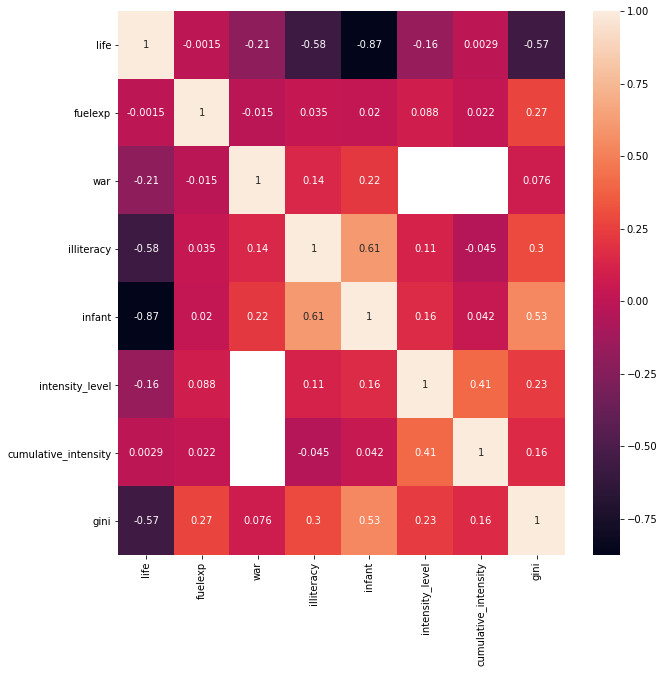

In [176]:
plt.figure(figsize=(10,10))
wellbeing_features = ["life", "fuelexp", "war", "illiteracy", "infant", "intensity_level", "cumulative_intensity", "gini"]
df_part_1 = final_df[(final_df.year > 1960) & (final_df.year <= 2000)]
corrMatrix = df_part_1[wellbeing_features].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

With the current data, we can see no correlation between oil export and any of the variable that is an index of well-being. As a consequence, it does not make sense to look for causation.
The only possibly relevant feature is the gini index. Further integrations of the Gini score into the dataset may be necessary.

## 2. What are the variables that have the most influence in the prediction of a war?

1. Use random forests to predict a war in a country
3. Use the gini index to check the variables' importance - a la replication
4. If gini index seems to be relevant, integrate more data

In [96]:
final_df[final_df.country == 'Iraq'].columns

297

In [121]:
used_columns = sorted(list(set(["ager", "agexp", "anoc", "army85", "autch98", "auto4",
    "autonomy", "avgnabo", "centpol3", "coldwar", "decade1", "decade2",
    "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel", "durable",
    "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec",
    "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57",
    "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life",
    "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0",
    "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt",
    "numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part",
    "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98",
    "polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg",
    "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew",
    "sxpsq", "tnatwar", "trade", "warhist", "xconst"]).union(set(wellbeing_features))))

In [118]:
df_part_2 = final_df[used_columns]

In [127]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
X = df_part_2.drop('war', axis=1)
y = df_part_2.war
rfc.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [151]:
for i,element in enumerate(X.loc[2]):    
    if np.isnan(element):
        print(i)

10
38
44


intensity_level: nan -> 0
cumulative_intensity: 1 - > 2, 0 -> 1, nan -> 0

In [161]:
X.intensity_level = X.intensity_level.apply(lambda x : 0 if np.isnan(x) else x)
X.cumulative_intensity = X.cumulative_intensity.apply(lambda x : 0 if np.isnan(x) else 1 if x == 1 else 2)

In [219]:
yet_another_gini_thing = pd.read_stata('data/WIID_06MAY2020.dta')

In [220]:
gini_years = yet_another_gini_thing[(yet_another_gini_thing.year > 1960) & (yet_another_gini_thing.year <= 2000)].copy()

In [223]:
#gini_years.country = [gini_years.get(c, c) for c in gini_years.country]

print(np.setdiff1d(final_df.country, gini_years.country))
print(np.setdiff1d(gini_years.country, final_df.country))

['Afghanistan' 'Bahamas' 'Bahrain' 'Benin' 'Bhutan' 'Bosnia-Herzegovina'
 'C.A.R.' 'Cape Verde' 'Chad' 'Comoros' 'Congo (Braz)' 'Czech Republic'
 'DR Congo (Zaire)' 'Gambia' 'Iceland' 'Iraq' 'Ivory Coast' 'Korea, South'
 'Libya' 'Macedonia' 'Myanmar (Burma)' 'Qatar' 'Russia (Soviet Union)'
 'Saudi Arabia' 'Solomon Islands' 'Somalia' 'South Vietnam' 'Swaziland'
 'Togo' 'U.A.R.' 'U.K.' 'U.S.A.' 'Vanuatu' 'Western Samoa' 'Yemen AR'
 'Yemen PR']
['Bahamas, The' 'Bosnia and Herzegovina' 'Central African Republic'
 "Cote d'Ivoire" 'Czechia' 'Eswatini' 'Gambia, The' 'Hong Kong'
 'Korea, Republic of' 'Micronesia, Federated States of' 'North Macedonia'
 'Puerto Rico' 'Reunion' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Serbia and Montenegro' 'Soviet Union'
 'Turks and Caicos Islands' 'United Kingdom' 'United States'
 'West Bank and Gaza']


In [251]:
gini_2_mapping = {
    'Bahamas, The' : 'Bahamas',
    'Bosnia and Herzegovina' : 'Bosnia-Herzegovina',
    'Central African Republic' : 'C.A.R.',
    "Cote d'Ivoire" : 'Ivory Coast',
    'Czechia' : 'Czech Republic',
    'Eswatini' : 'Swaziland',
    'Gambia, The' : 'Gambia',
    'Korea, Republic of' : 'Korea, South',
    'North Macedonia' : 'Macedonia',
    'Serbia and Montenegro' : 'Serbia',
    'Soviet Union' : 'Russia (Soviet Union)',
    'United Kingdom' : 'U.K.',
    'United States' : 'U.S.A.'
}

gini_years.country = gini_years.country.apply(lambda c : gini_2_mapping[c] if c in gini_2_mapping else c)

In [273]:
# missing_in_first_gini_df = ['Afghanistan', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan',
#        'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
#        'Bolivia', 'Brazil', 'Brunei', 'Cambodia', 'Canada', 'Chile',
#        'Colombia', 'Costa Rica', 'Cuba', 'Czechoslovakia',
#        'Dominican Republic', 'Ecuador', 'El Salvador', 'Fiji', 'Georgia',
#        'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Indonesia',
#        'Israel', 'Jamaica', 'Japan', 'Kazakhstan', 'Korea, South',
#        'Kyrgyzstan', 'Laos', 'Malaysia', 'Malta', 'Mexico', 'Mongolia',
#        'Myanmar (Burma)', 'Nepal', 'New Zealand', 'Nicaragua', 'Pakistan',
#        'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
#        'Russia (Soviet Union)', 'Singapore', 'Solomon Islands',
#        'South Vietnam', 'Sri Lanka', 'Suriname', 'Taiwan', 'Tajikistan',
#        'Thailand', 'Trinidad and Tobago', 'Turkmenistan', 'U.A.R.',
#        'Ukraine', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
#        'Vietnam', 'Western Samoa', 'Yemen AR', 'Yemen PR', 'Yugoslavia']


gini_by_country_year = gini_years[['country', 'year', 'gini_reported']].groupby(['country', 'year']).mean()
gini_by_country_year.gini_reported = gini_by_country_year.gini_reported.apply(lambda x : x/100)
gini_by_country_year.reset_index(inplace=True)
gini_by_country_year.columns = ['country', 'year', 'gini']

In [261]:
ineq_gini = ineq_gini.drop(['percentile', 'age', 'pop'], axis=1)

KeyError: "['percentile' 'age' 'pop'] not found in axis"

In [262]:
ineq_gini

,country,year,gini
25254,United Arab Emirates,1990,0.684749
25255,United Arab Emirates,1991,0.686039
25256,United Arab Emirates,1992,0.687342
25257,United Arab Emirates,1993,0.688658
25258,United Arab Emirates,1994,0.689989
...,...,...,...
19710,Zanzibar,1995,0.537189
19711,Zanzibar,1996,0.539508
19712,Zanzibar,1997,0.541827
19713,Zanzibar,1998,0.544146


In [282]:
gini_final = pd.concat([ineq_gini, gini_by_country_year]).groupby(['country', 'year']).mean()
gini_final.reset_index(inplace=True)
gini_final = gini_final.drop('index', axis=1)

In [283]:
gini_final

,country,year,gini
0,Africa,1990.0,0.685235
1,Africa,1991.0,0.689463
2,Africa,1992.0,0.689618
3,Africa,1993.0,0.683780
4,Africa,1994.0,0.682264
...,...,...,...
3160,Zimbabwe,1995.0,0.698136
3161,Zimbabwe,1996.0,0.664328
3162,Zimbabwe,1997.0,0.660513
3163,Zimbabwe,1998.0,0.656699


In [328]:
used_columns.append('year')

In [330]:
final_df = joined.merge(gini_final, how='left', on=["country", "year"])

In [331]:
final_df

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,proxregc,sxpnew.2,sxpsq.2,conflict_id,intensity_level,cumulative_intensity,territory_name,region_y,war,gini
0,Afghanistan,1.0,1945,1.0,0.0,1.0,1.0,700.0,0.0,12.0,...,0.143299,0.094095,0.094095,NaN,NaN,NaN,NaN,NaN,0,NaN
1,Afghanistan,1.0,1946,2.0,0.0,2.0,1.0,700.0,0.0,24.0,...,1.000000,0.094547,0.094547,NaN,NaN,NaN,NaN,NaN,0,NaN
2,Afghanistan,1.0,1947,3.0,0.0,3.0,1.0,700.0,0.0,36.0,...,1.000000,0.095567,0.095567,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Afghanistan,1.0,1948,4.0,0.0,4.0,1.0,700.0,0.0,48.0,...,1.000000,0.101303,0.101303,NaN,NaN,NaN,NaN,NaN,0,NaN
4,Afghanistan,1.0,1949,5.0,0.0,5.0,1.0,700.0,0.0,60.0,...,1.000000,0.092107,0.092107,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7589,Yemen,NaN,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,320.0,1.0,0.0,Common border,2,1,NaN
7590,Yemen,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,230.0,1.0,1.0,NaN,2,1,NaN
7591,Yemen,NaN,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,230.0,1.0,1.0,NaN,2,1,NaN
7592,Yemen,NaN,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,230.0,1.0,1.0,NaN,2,1,NaN


In [332]:
final_df.intensity_level = final_df.intensity_level.apply(lambda x : 0 if np.isnan(x) else x)
final_df.cumulative_intensity = final_df.cumulative_intensity.apply(lambda x : 0 if np.isnan(x) else 1 if x == 1 else 2)

In [342]:
df_part_2 = final_df[used_columns]
df_gini = df_part_2[(df_part_2.year > 1960) & (df_part_2.year <= 2000)]

In [356]:
df_no_gini = df_gini.drop('gini', axis=1)
df_no_gini_clean = df_no_gini.dropna()

In [368]:
df_gini_clean = df_gini.dropna()

In [372]:
X = df_no_gini_clean.drop(['war', 'country', 'year', 'intensity_level', 'cumulative_intensity', 'milper'], axis=1)
y = df_no_gini_clean.war
rfc.fit(X, y)

RandomForestClassifier()

In [373]:
df_no_gini_clean.war.values.sum()/len(df_no_gini_clean)

0.2236273411237394

In [374]:
sorted(list(zip(rfc.feature_importances_, df_no_gini_clean.drop(['war', 'country', 'year', 'intensity_level', 'cumulative_intensity', 'milper'], axis=1).columns)))

[(0.00046815594223147247, 'geo2'),
 (0.0006455596695869735, 'nwstate'),
 (0.0007265774841965885, 'presi'),
 (0.0008155417839688612, 'dem'),
 (0.0008858615334880787, 'autonomy'),
 (0.0009328636791427089, 'incumb'),
 (0.001115145878302812, 'demch98'),
 (0.001168857245706328, 'geo69'),
 (0.0012221072170924504, 'major'),
 (0.0012529537080542283, 'autch98'),
 (0.001292005556817937, 'reg'),
 (0.0013758671463943314, 'decade1'),
 (0.0014114012542832983, 'geo34'),
 (0.0014701823925903842, 'part'),
 (0.0014847588576476797, 'polch98'),
 (0.0014927930682375322, 'centpol3'),
 (0.001542197226825819, 'oil'),
 (0.0015467727697545863, 'geo1'),
 (0.00166198830830033, 'decade3'),
 (0.0017370770186297152, 'coldwar'),
 (0.0017760388068934214, 'mirps2'),
 (0.0018141130556299108, 'decade2'),
 (0.0018553483635964524, 'geo8'),
 (0.0019688956313594526, 'partfree'),
 (0.0019912832384710415, 'inst'),
 (0.0021955943690753032, 'etdo4590'),
 (0.0025316158306639414, 'mirps1'),
 (0.002594205340040173, 'p4mchg'),
 (0.0

In [375]:
X = df_gini_clean.drop(['war', 'country', 'year', 'intensity_level', 'cumulative_intensity', 'milper'], axis=1)
y = df_gini_clean.war
rfc.fit(X, y)

RandomForestClassifier()

In [376]:
sorted(list(zip(rfc.feature_importances_, df_gini_clean.drop(['war', 'country', 'year', 'intensity_level', 'cumulative_intensity', 'milper'], axis=1).columns)))

[(0.00029930324240336236, 'nwstate'),
 (0.00033361716865965945, 'geo1'),
 (0.0003891747041752772, 'geo2'),
 (0.0004138655897455226, 'presi'),
 (0.0005642444115519199, 'incumb'),
 (0.0006438156050466978, 'reg'),
 (0.000783021816839962, 'autonomy'),
 (0.001141544678879805, 'decade1'),
 (0.001167373605555788, 'demch98'),
 (0.001192031688181541, 'geo69'),
 (0.0012099873141891643, 'dem'),
 (0.0013078165398653246, 'part'),
 (0.00160715623029955, 'anoc'),
 (0.0016380133317714799, 'oil'),
 (0.0016836568420584511, 'decade3'),
 (0.0016868225781147817, 'inst3'),
 (0.001747441023005776, 'centpol3'),
 (0.0018629984194627025, 'coldwar'),
 (0.001986619166299414, 'polch98'),
 (0.0020129529480315154, 'geo8'),
 (0.0020390110509383285, 'major'),
 (0.00210865112696155, 'inst'),
 (0.0022055588990597223, 'mirps2'),
 (0.0023053203177425675, 'decade4'),
 (0.0023853688737212335, 'mirps3'),
 (0.0024140828118374364, 'etdo4590'),
 (0.002457334563191844, 'geo57'),
 (0.002485760175792373, 'exrec'),
 (0.002517584401